# Ploting Reputation metrics.

Printing reputation metrics from a run on the following JSON files : 
* `client_weights.json`: Weights for each participants after each round.
* `distribution.json`: Initial participants distribution that clustering should ideally reproduce. 

To dynamically produce plot labels depending on the reputation parameters the following keys are extracted from the hydra configuration file : 
* `strategy.reputation_metric` : The metric used for reputation, used since it has an incidence on the clustering results, it is expresed as an indication.

Those keys are obtained by parsing the following yaml file :
* `.hydra/config.yaml` : 

This file follow the following structure :

\# The typology of the attackers is h1 titles (e.g. benign/loud/increment/redemption ...) 

\#\# Quantity of attackers is h2 title (e.g. lone, sybils)

\#\#\# Target type is h3 title (e.g. targeted/untargeted)

\#\#\#\# History setings is h4 titles (e.g. lambda = 0, lambda, 0.3, ...)

In [2]:
from trustfids.utils.plot_reput import *
from trustfids.utils.plot_cluster import *
from trustfids.utils.stats_utils import get_missrate,get_missrate_percent

## Paper grahs

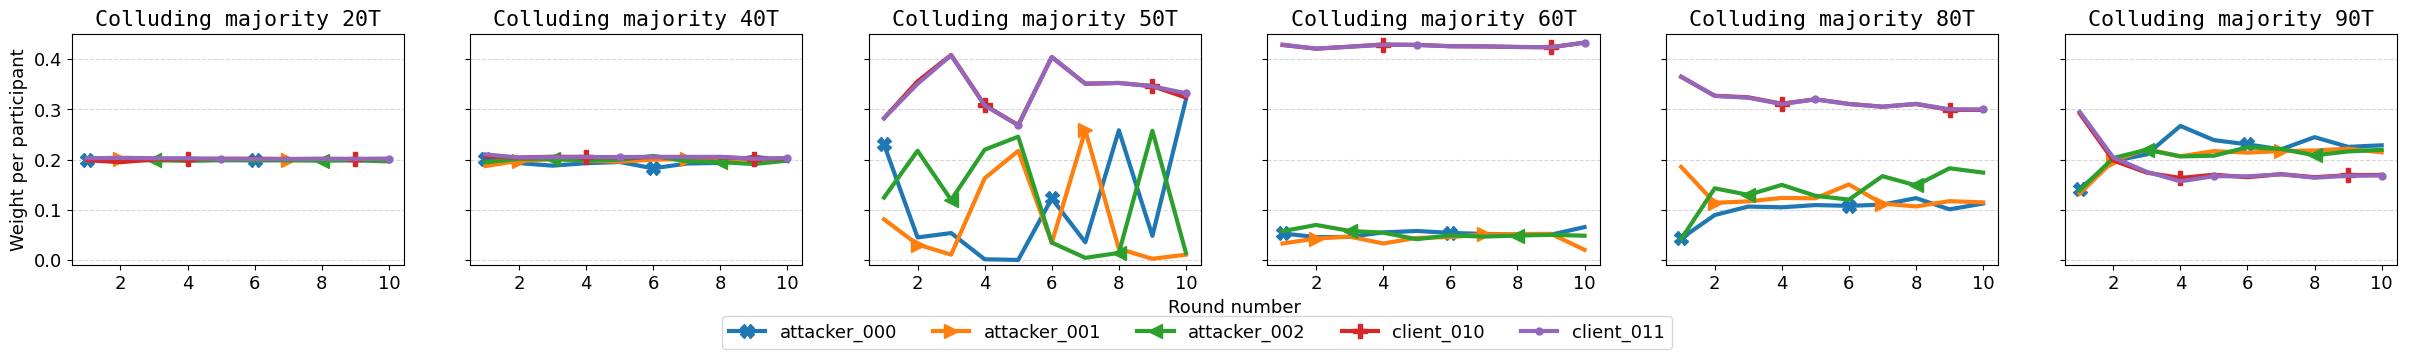

In [2]:
from trustfids.utils.plot_reput import *
paths = []
labels = []
for i in [0.2,0.4,0.5,0.6,0.8,0.9] : 
    paths.append(f"./trustfids/sybils/targeted/{i}")
    labels.append(f"Colluding majority {int(i*100)}T")
plot_multi_weights_in_cluster(paths, out_path="./figures/reputation/majority_attackers_targeted_multiple_percents.pdf",labels=labels, dataset="botiot", title="" ,zero_indexed=True, exploded=True, fontsize=13, zoomed_scale=True)


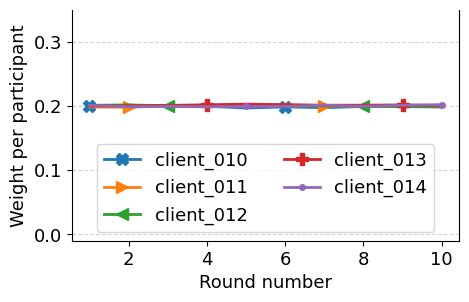

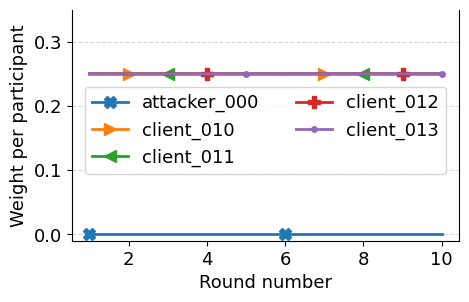

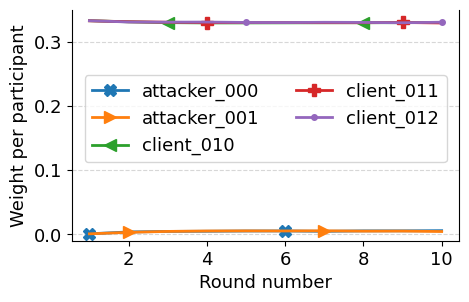

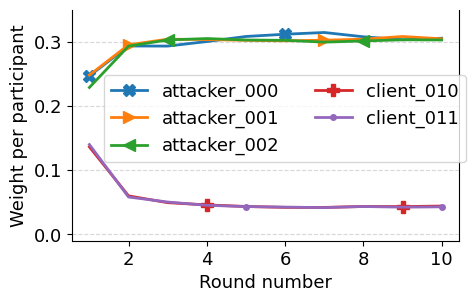

In [3]:
benign = "./trustfids/benign/"
lone = "./trustfids/lone/targeted/loud"
byzantine_min = "./trustfids/sybils_min/targeted/loud"
byzantine = "./trustfids/sybils/targeted/loud"

# print(get_missrate_percent(benign,"botiot","Reconnaissance"))
plot_weights_in_cluster(
    benign,
    dataset="botiot", 
    out_path="./figures/reputation/benign_expanded.pdf", 
    fontsize=13, 
    zoomed_scale=True,
    small_fig=True,
    legend_param = {
        "loc":"lower center",
        "ncol":2},
    )

# print(get_missrate_percent(lone,"botiot","Reconnaissance"))
plot_weights_in_cluster(
    lone,
    dataset="botiot", 
    out_path="./figures/reputation/lone_loud_expanded.pdf", 
    fontsize=13, 
    zoomed_scale=True,
    small_fig=True,
    legend_param = {
        "loc":"lower center",
        "bbox_to_anchor":(0.5, 0.25),
        "ncol":2},
    )

# print(get_missrate_percent(byzantine_min,"botiot","Reconnaissance"))
plot_weights_in_cluster(
    byzantine_min,
    dataset="botiot", 
    out_path="./figures/reputation/byzantine_minority_loud_expanded.pdf", 
    fontsize=13, 
    zoomed_scale=True,
    small_fig=True,
    legend_param = {
        "loc":"lower center",
        "bbox_to_anchor":(0.5, 0.30),
        "ncol":2},
    )

# plot_weights_in_cluster(byzantine,dataset="botiot", out_path="./figures/reputation/byzantine_majority_loud_expanded.pdf", exploded=True, fontsize=13, y_centered_legend=True, zoomed_scale=True,small_fig=True)
# print(get_missrate_percent(byzantine,"botiot","Reconnaissance"))
plot_weights_in_cluster(
    byzantine,
    dataset="botiot", 
    out_path="./figures/reputation/byzantine_majority_loud_expanded.pdf", 
    fontsize=13, 
    zoomed_scale=True,
    small_fig=True,
    legend_param = {
        "loc":"lower center",
        "bbox_to_anchor":(0.55, 0.30),
        "ncol":2},
    )


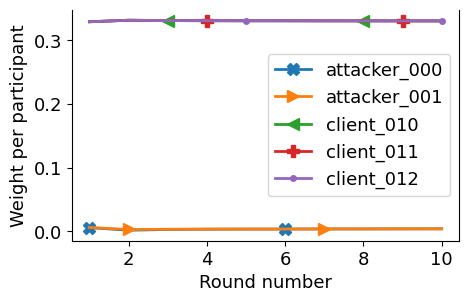

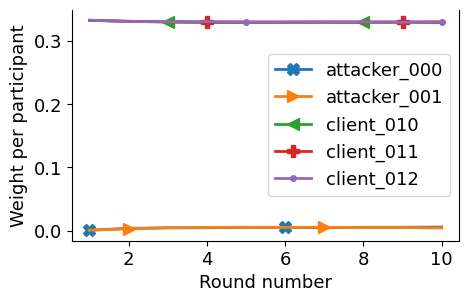

In [7]:

sybils_min_untargeted_stealth ="./trustfids/sybils_min/untargeted/0.9"
byzantine_min = "./trustfids/sybils_min/targeted/loud"

plot_weights_in_cluster(sybils_min_untargeted_stealth,dataset="botiot", out_path="./figures/reputation/untargeted_byzantine_minority_stealth_0_9.pdf", exploded=False, fontsize=13,zoomed_scale=False, y_centered_legend=True,small_fig=True)
plot_weights_in_cluster(byzantine_min,dataset="botiot", out_path="./figures/reputation/byzantine_minority_loud_expanded.pdf", exploded=True, fontsize=13, y_centered_legend=True, small_fig=True)


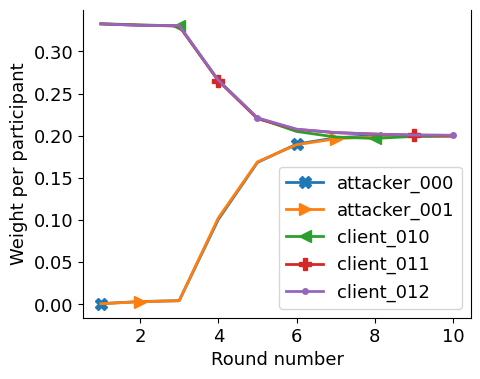

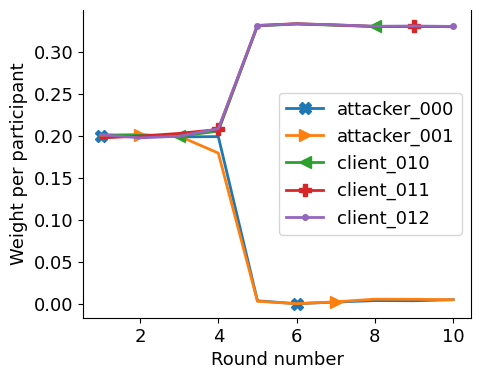

In [6]:

byzantine_min_redemption = "./trustfids/sybils_min/targeted/redemption"
byzantine_min_increment = "./trustfids/sybils_min/targeted/increment"

plot_weights_in_cluster(byzantine_min_redemption,dataset="botiot", out_path="./figures/reputation/redemption_byzantine_min.pdf", exploded=True, fontsize=13,zoomed_scale=False)
plot_weights_in_cluster(byzantine_min_increment,dataset="botiot", out_path="./figures/reputation/increment_byzantine_min.pdf", exploded=True, fontsize=13,y_centered_legend=True)


# Data quality 

## lone

Analysis : 
- Until ~40% of label flipped, participants provide models that are good and are thus not penalized. 
- Between 40 and 50% of label flipped, participants models are flagged by the reputation system but not in an homogeneous manner. 
- Past 60% of flipped labels, the participants are flagged by the reputation system


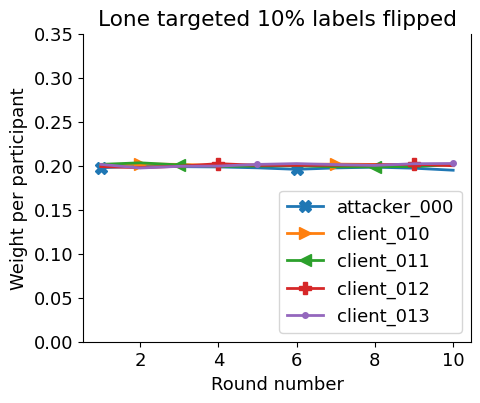

('Miss rate : 0.0%', 'Detection rate :100.0%') 10% 


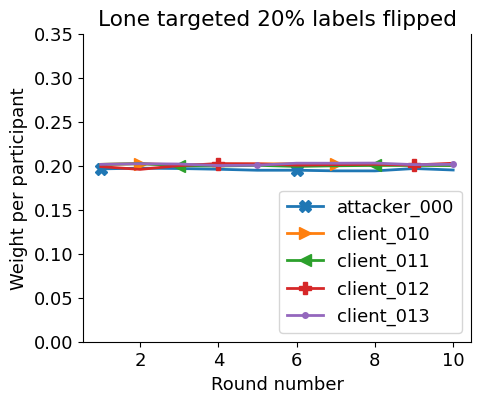

('Miss rate : 0.0%', 'Detection rate :100.0%') 20% 


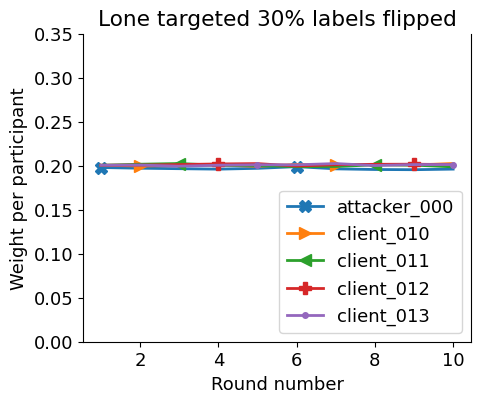

('Miss rate : 0.1232419892706974%', 'Detection rate :99.8767580107293%') 30% 


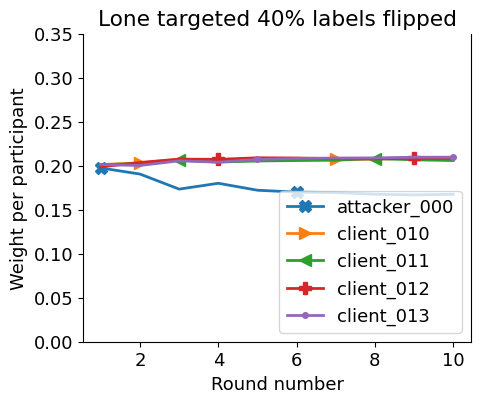

('Miss rate : 0.17398869073510223%', 'Detection rate :99.8260113092649%') 40% 


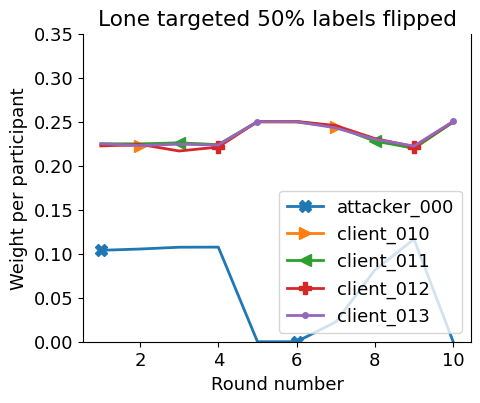

('Miss rate : 0.0%', 'Detection rate :100.0%') 50% 


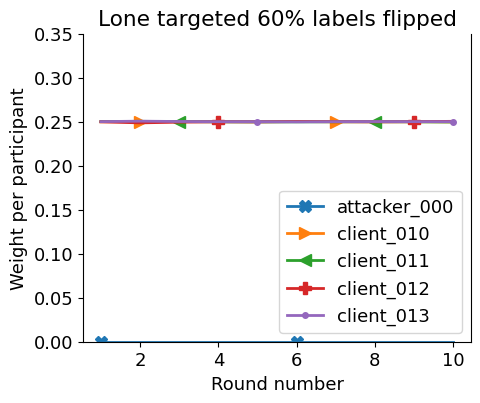

('Miss rate : 0.0%', 'Detection rate :100.0%') 60% 


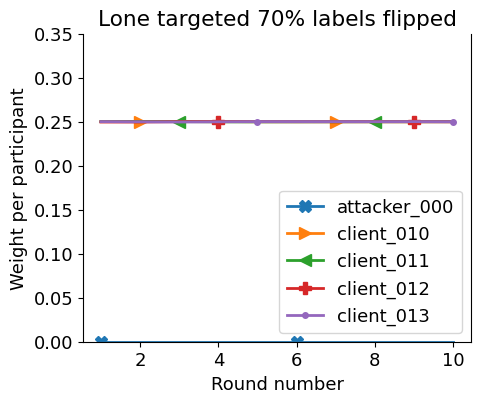

('Miss rate : 0.0%', 'Detection rate :100.0%') 70% 


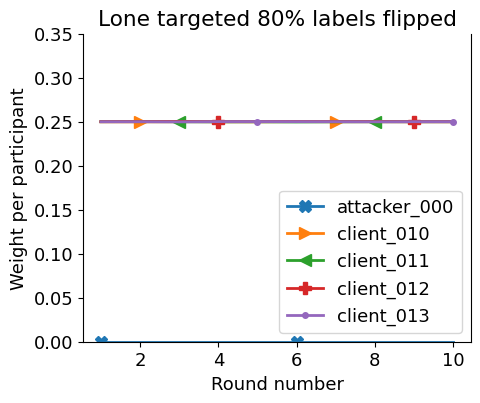

('Miss rate : 0.0%', 'Detection rate :100.0%') 80% 


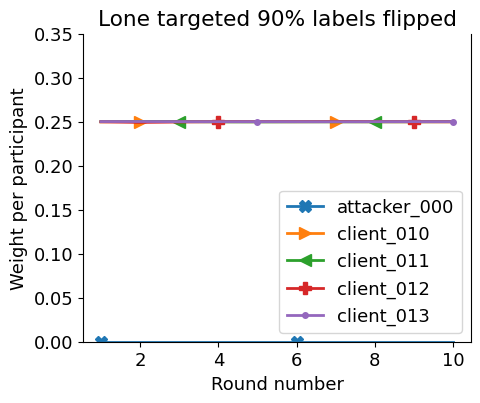

('Miss rate : 0.0%', 'Detection rate :100.0%') 90% 


In [5]:
for i in range(1,10) : 
    
    path = f"./trustfids/lone/targeted/{round(i*0.1,1)}"
    plot_weights_in_cluster(path,dataset="botiot", title=f"Lone targeted {i*10}% labels flipped" ,zero_indexed=True, exploded=True, fontsize=13, zoomed_scale=True)
    print(get_missrate_percent(path,"botiot","Reconnaissance"),f"{i*10}% " )

## Colluding in minority 

Analysis : 
- Until ~40% of label flipped, participants provide models that are good and are thus not penalized. 
- Between 40 and 50% of label flipped, participants models are flagged by the reputation system but not in an homogeneous manner. 
- Past 60% of flipped labels, the participants are flagged by the reputation system


In [16]:
for i in range(1,9) : 
    
    path = f"./trustfids/sybils_min/targeted/{round(i*0.1,1)}"
    plot_weights_in_cluster(path,dataset="botiot", title=f"Colluding in minority targeted {i*10}% labels flipped" ,zero_indexed=True, exploded=True, fontsize=13, zoomed_scale=True)
    print(get_missrate_percent(path,"botiot","Reconnaissance"),f"{i*10}% " )

('Miss rate : 0.05074670146440482%', 'Detection rate :99.9492532985356%') 10% 
('Miss rate : 0.13774104683195593%', 'Detection rate :99.86225895316805%') 20% 
('Miss rate : 0.1594896331738437%', 'Detection rate :99.84051036682615%') 30% 
('Miss rate : 0.2174858634188778%', 'Detection rate :99.78251413658113%') 40% 
('Miss rate : 0.07974481658692185%', 'Detection rate :99.92025518341308%') 50% 
('Miss rate : 0.0%', 'Detection rate :100.0%') 60% 
('Miss rate : 0.0%', 'Detection rate :100.0%') 70% 
('Miss rate : 0.0%', 'Detection rate :100.0%') 80% 


## Colluding in majority

Analysis : 
- Until ~40% of label flipped, participants provide models that are good and are thus not penalized. 
- Between 40 and 80% of label flipped, benign participants that are a minority gain precedence.  
- At 90% the reputation system converge to give attackers more weight. 


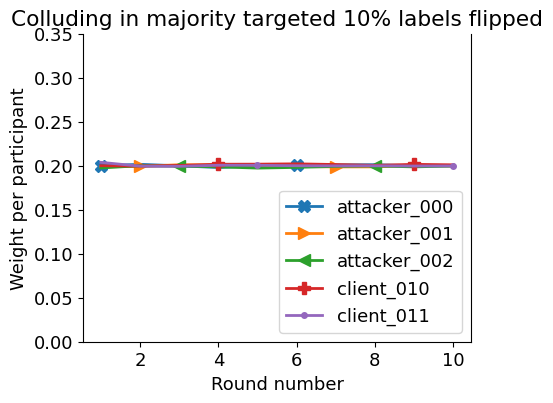

('Miss rate : 0.16673916195447297%', 'Detection rate :99.83326083804552%') 10% 


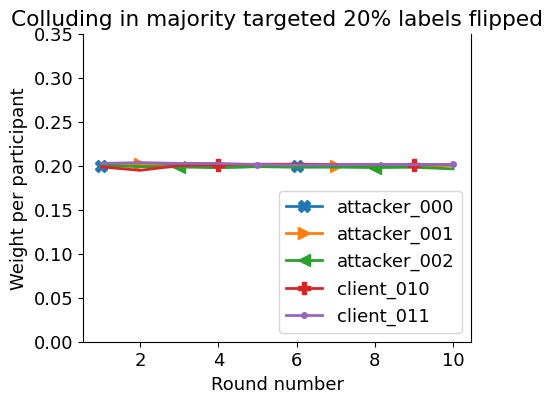

('Miss rate : 0.25373350732202404%', 'Detection rate :99.74626649267798%') 20% 


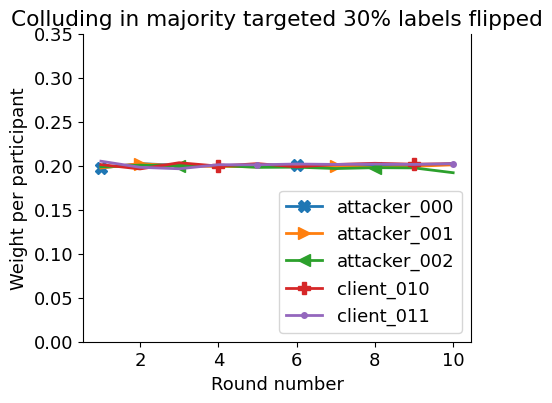

('Miss rate : 0.25373350732202404%', 'Detection rate :99.74626649267798%') 30% 


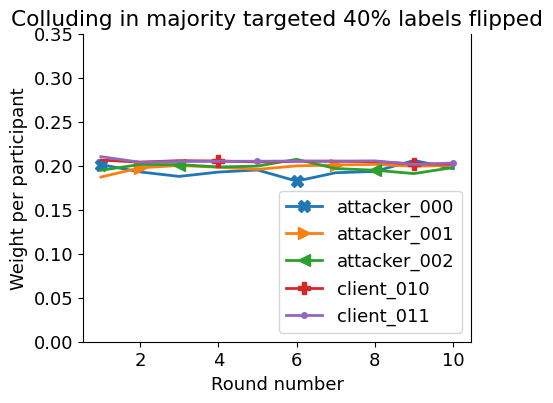

('Miss rate : 0.5002174858634189%', 'Detection rate :99.49978251413658%') 40% 


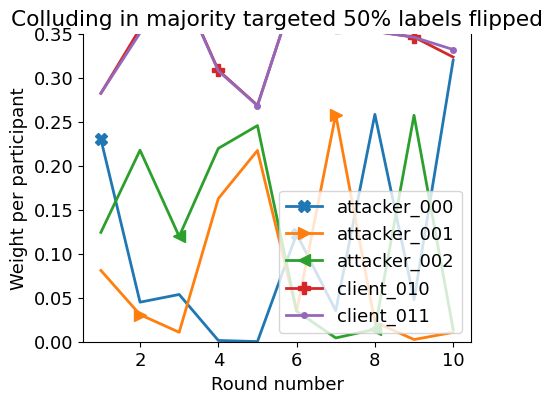

('Miss rate : 0.4929679570827896%', 'Detection rate :99.5070320429172%') 50% 


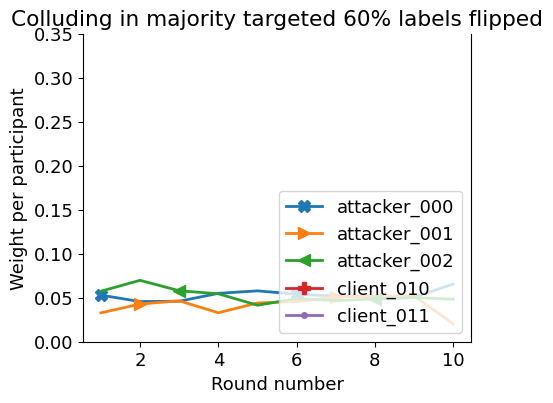

('Miss rate : 0.08699434536755112%', 'Detection rate :99.91300565463244%') 60% 


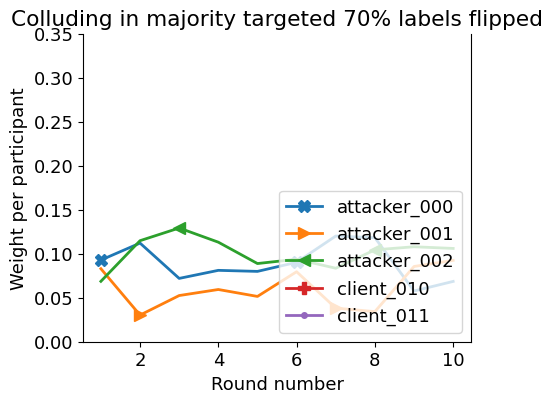

('Miss rate : 0.3624764390314629%', 'Detection rate :99.63752356096853%') 70% 


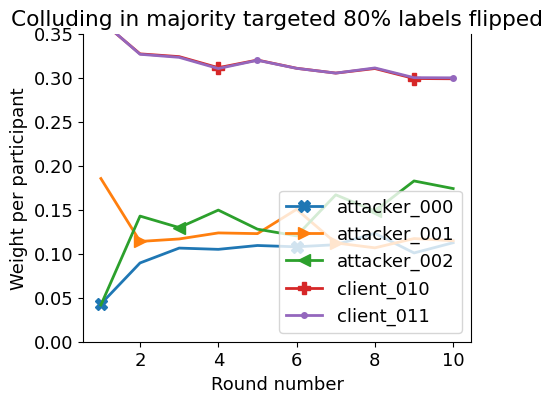

('Miss rate : 0.6379585326953748%', 'Detection rate :99.36204146730464%') 80% 


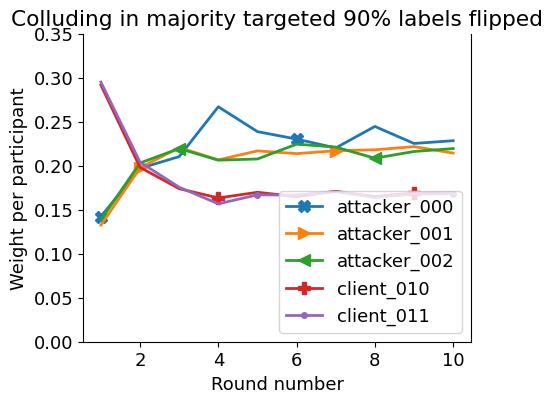

('Miss rate : 55.56038857474264%', 'Detection rate :44.43961142525736%') 90% 


In [3]:
for i in range(1,10) : 
    
    path = f"./trustfids/sybils/targeted/{round(i*0.1,1)}"
    plot_weights_in_cluster(path,dataset="botiot", title=f"Colluding in majority targeted {i*10}% labels flipped" ,zero_indexed=True, exploded=True, fontsize=13, zoomed_scale=True)
    print(get_missrate_percent(path,"botiot","Reconnaissance"),f"{i*10}% " )

# Loud

### targeted

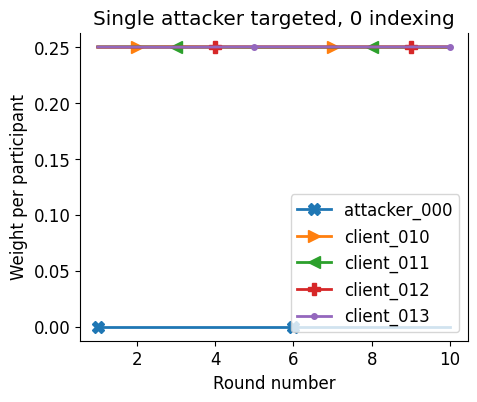

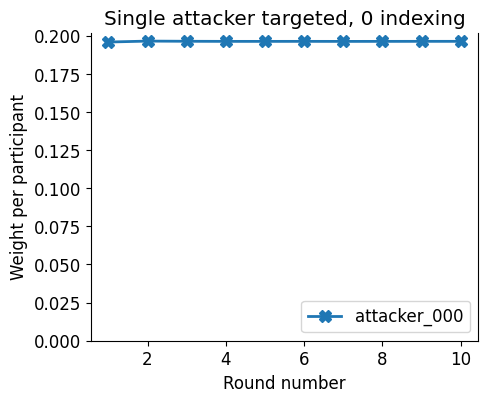

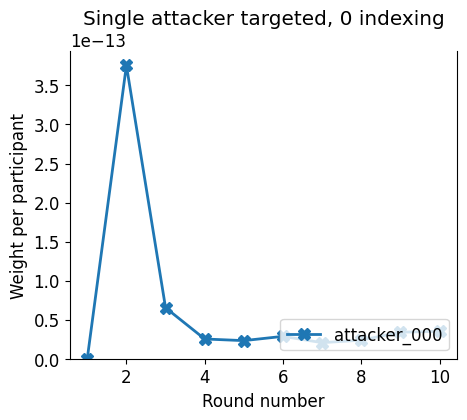

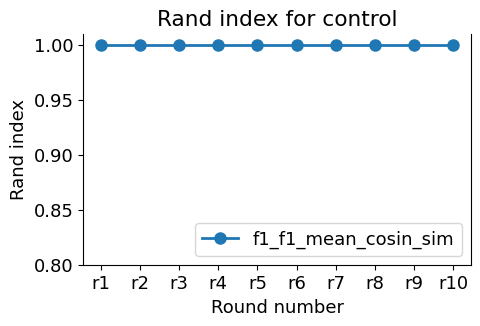

('Miss rate : 0.0%', 'Detection rate :100.0%')


In [7]:
p="./trustfids/lone/targeted/loud"
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", exploded=False, zero_indexed=True, attacker_only=True)
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")
print(get_missrate_percent(p,"botiot","Reconnaissance"))

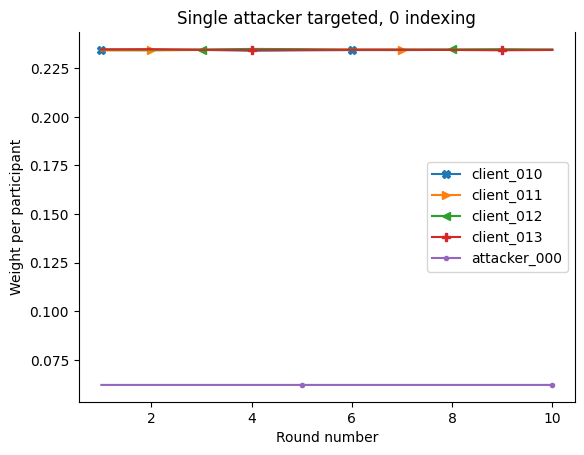

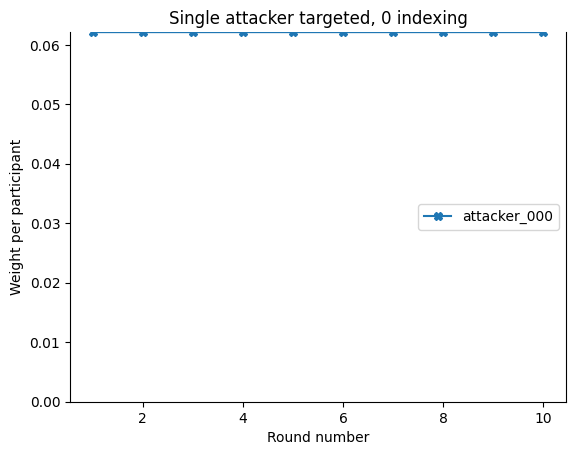

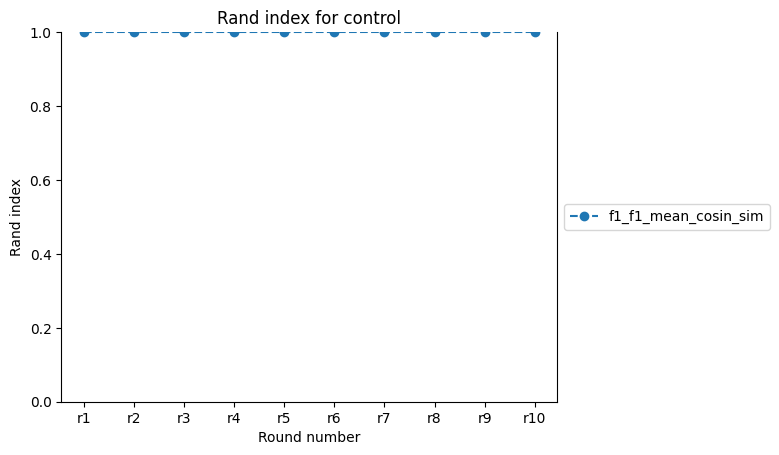

In [ ]:
p="../outputs/2023-09-01/13-37-19"
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p ="../multirun/2023-08-22/14-47-05/scenario_attacker=loud,scenario_distribution=lone,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

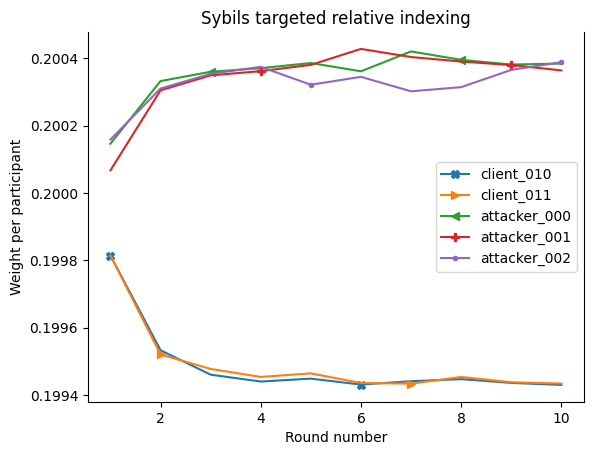

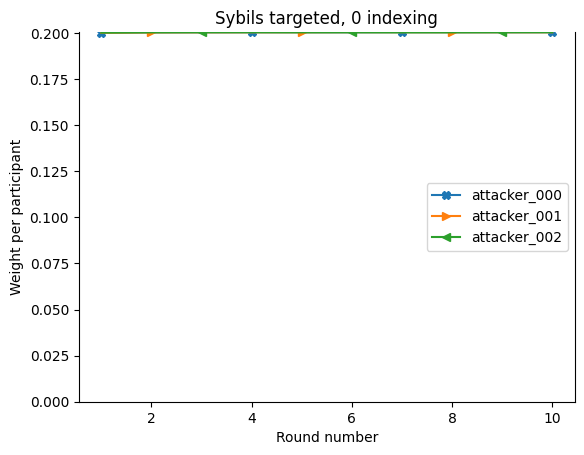

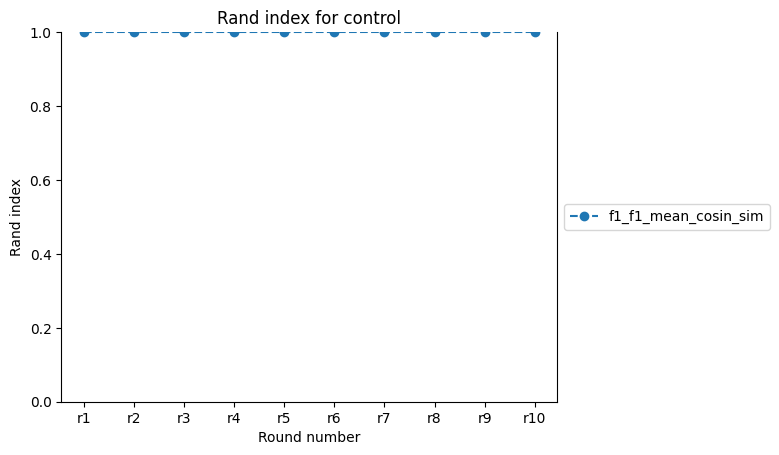

In [ ]:
p ="../multirun/2023-08-30/14-10-23/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=loud,scenario_distribution=sybils,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

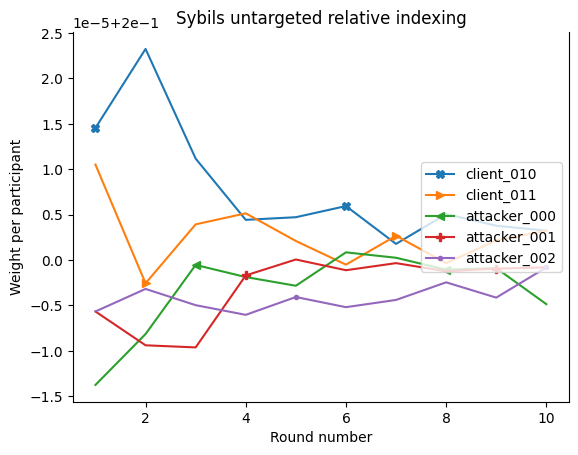

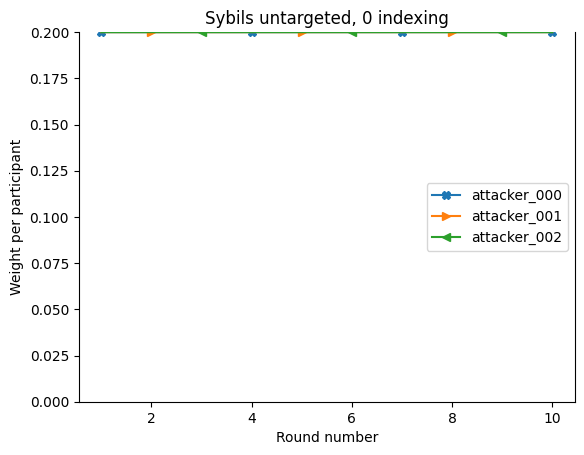

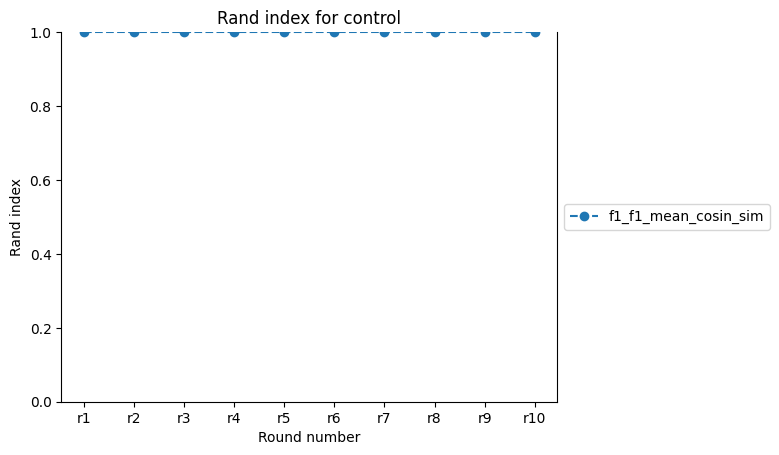

In [ ]:
p ="../multirun/2023-08-30/14-10-23/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=loud,scenario_distribution=sybils,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils minority 


### Targeted

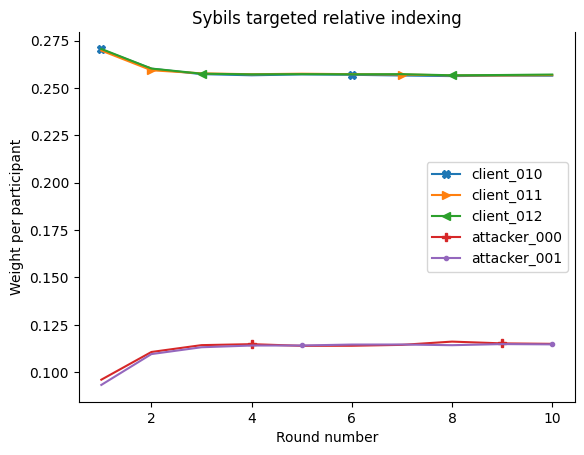

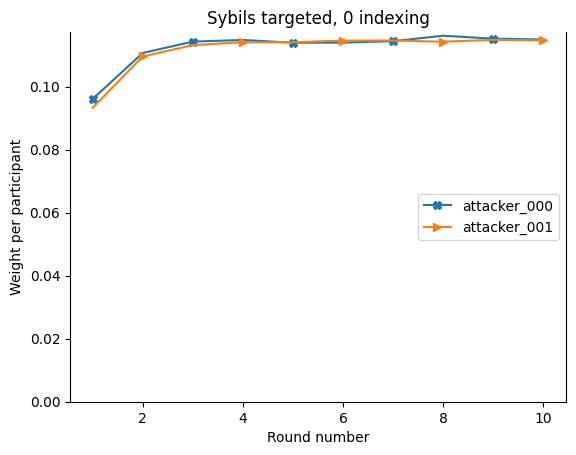

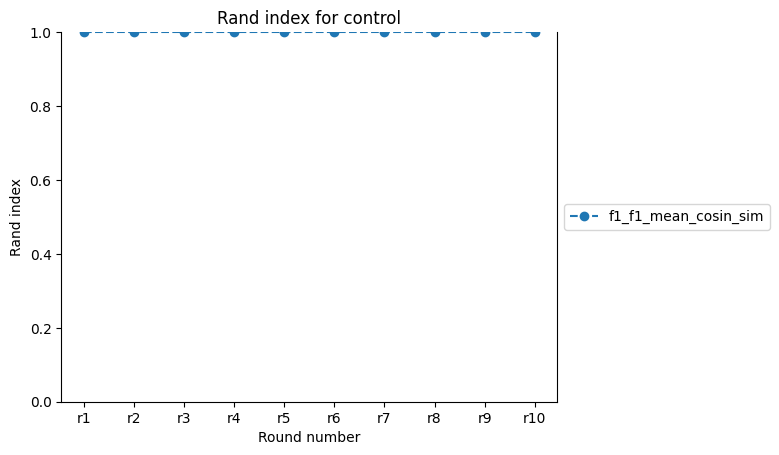

('Miss rate : 4.023488473249238%', 'Detection rate :95.97651152675077%')


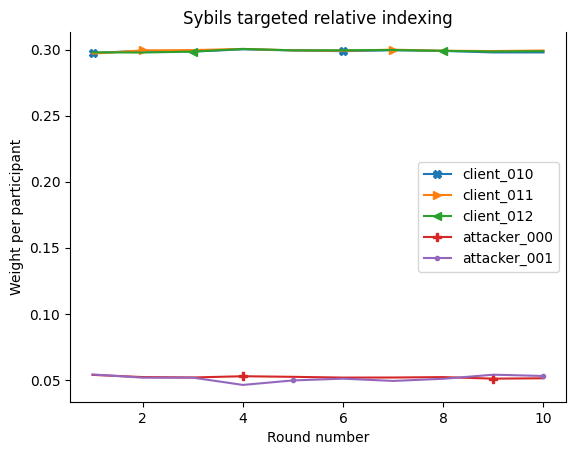

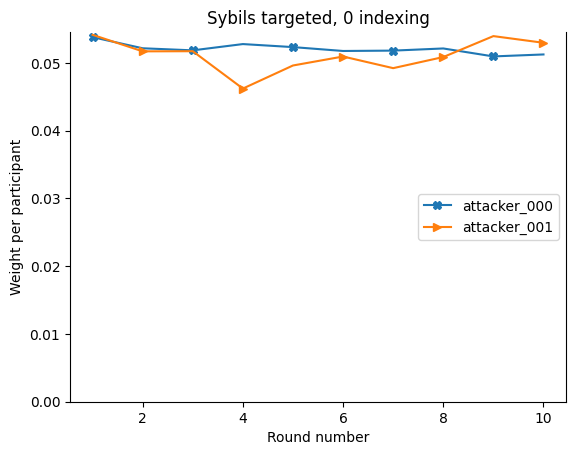

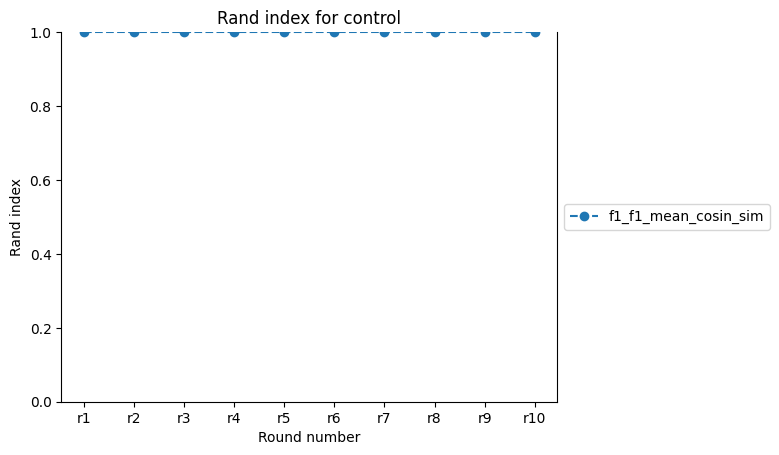

('Miss rate : 0.3624764390314629%', 'Detection rate :99.63752356096853%')


In [ ]:
p ="../multirun/2023-09-07/18-29-51/+scenario_target=targeted,scenario_attacker=loud,scenario_distribution=sybils_min"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")
print(get_missrate_percent(p,"botiot","Reconnaissance"))

p ="../multirun/2023-09-08/09-15-13/+scenario_target=targeted,scenario_attacker=loud,scenario_distribution=sybils_min"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")
print(get_missrate_percent(p,"botiot","Reconnaissance"))

### Untargeted

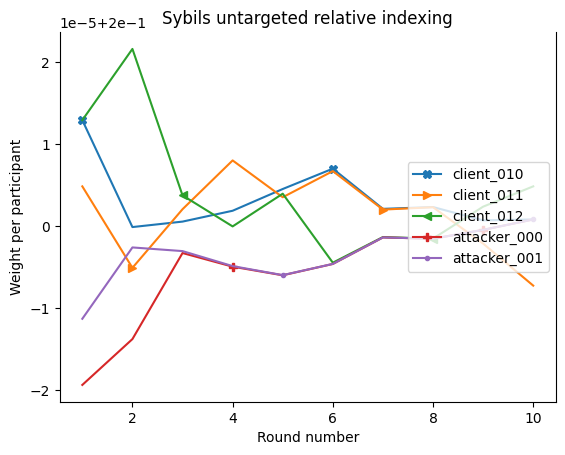

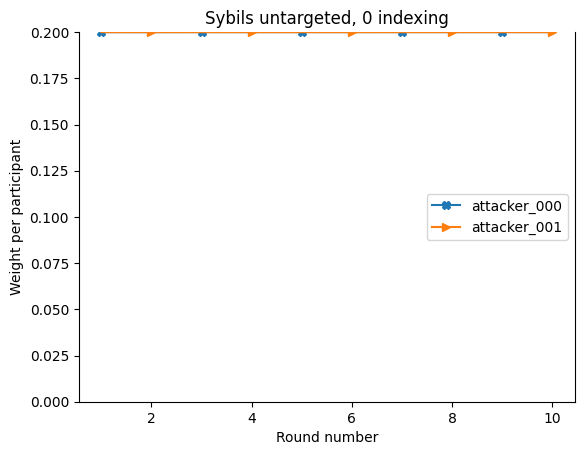

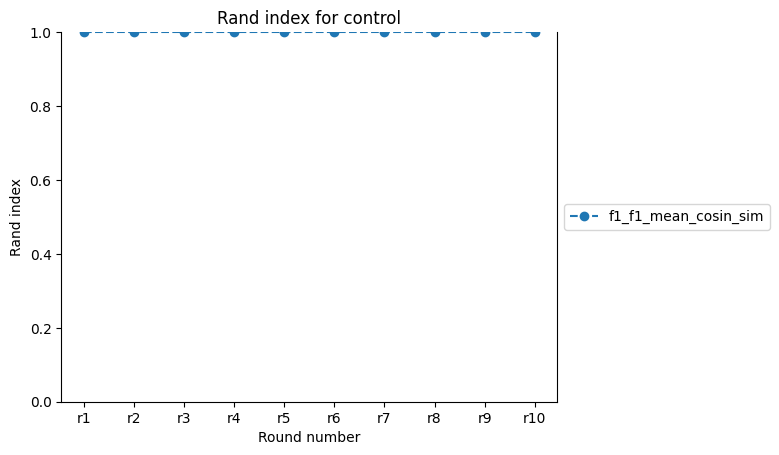

In [ ]:
p ="../multirun/2023-08-30/14-10-23/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=loud,scenario_distribution=sybils_min,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Stealth

## lone

### targeted

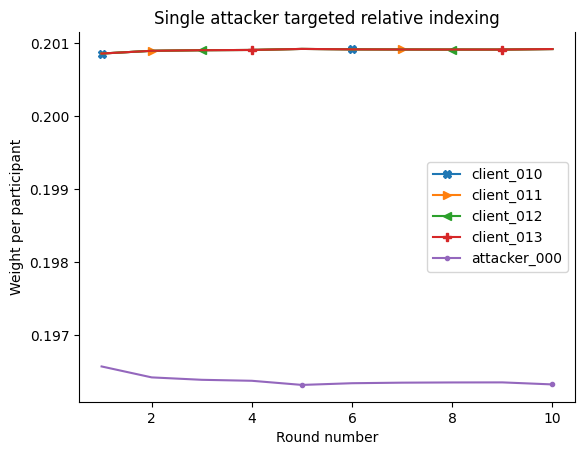

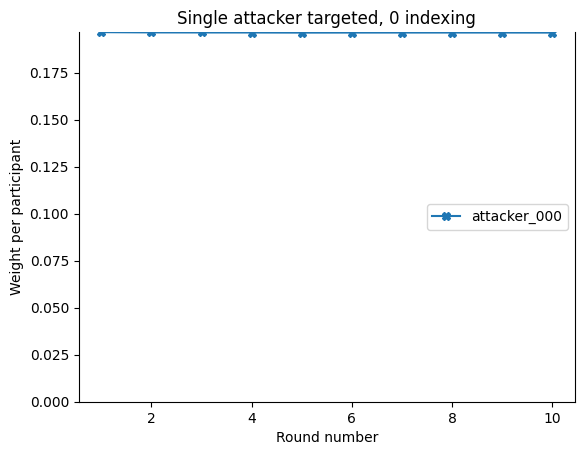

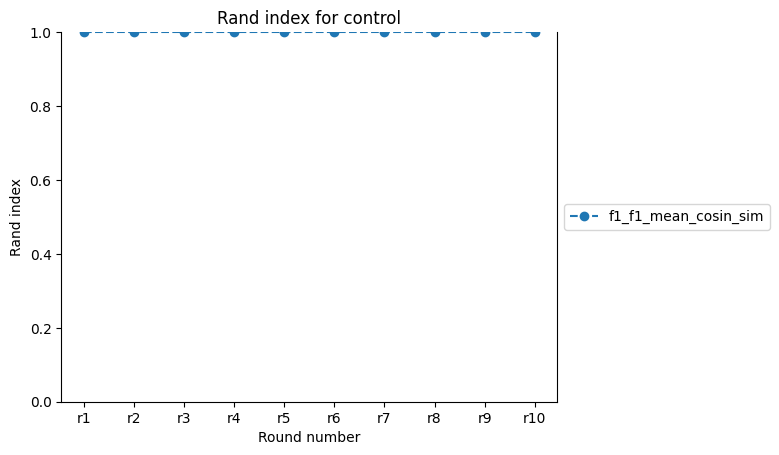

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p ="../multirun/2023-08-22/14-47-05/scenario_attacker=loud,scenario_distribution=lone,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Stealth

## lone

### targeted

Takeaways : 
- The amount of poisoning stays undetected during all the approach.

Further experiments :
- Try to augment the lambda parameter to 0.8 and 1.0 in this setting to see if the detection improve.

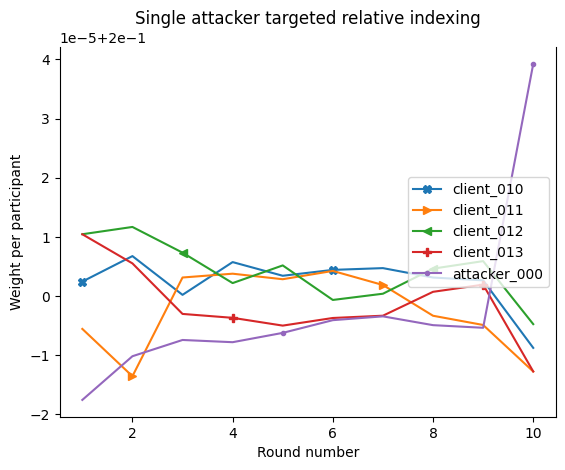

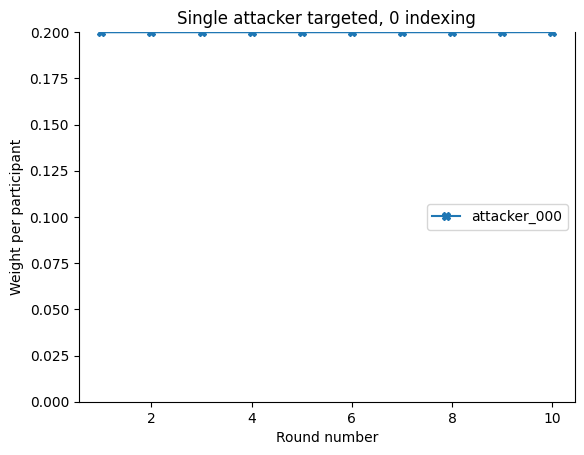

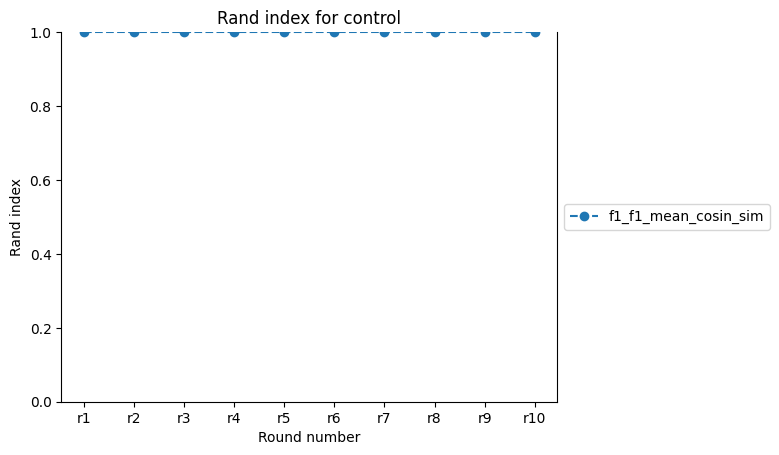

In [ ]:
p ="../multirun/2023-08-28/15-47-25/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=stealth,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")
print(get_missrate_percent(p,"botiot","Reconnaissance"))

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

In [ ]:
p ="../multirun/2023-09-08/09-15-13/+scenario_target=targeted,scenario_attacker=stealth,scenario_distribution=sybils_min"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")


### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Increment

## lone

### targeted

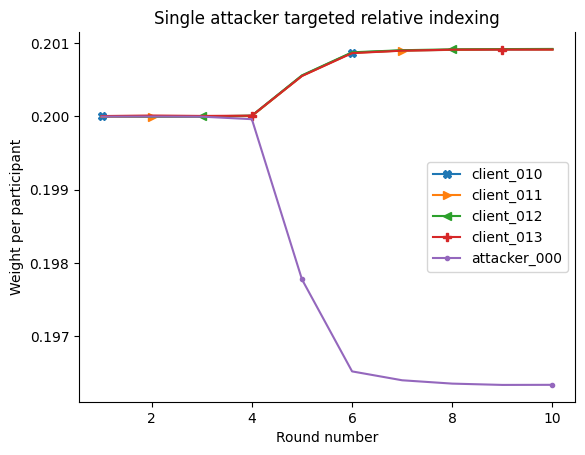

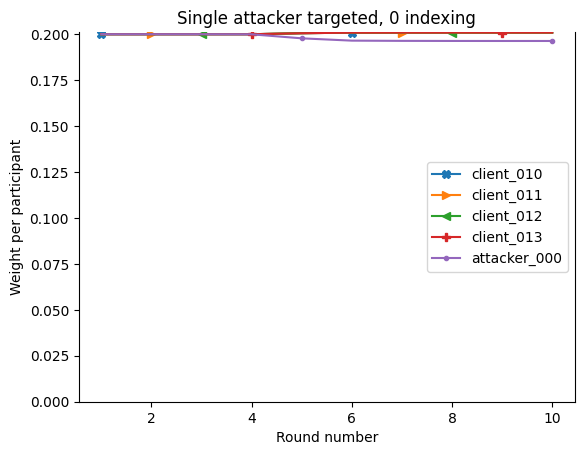

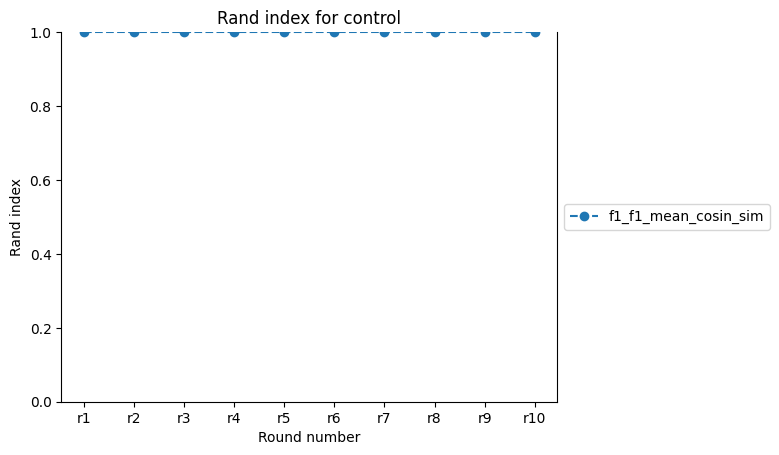

In [ ]:
p = "../multirun/2023-08-28/15-47-25/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=increment,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

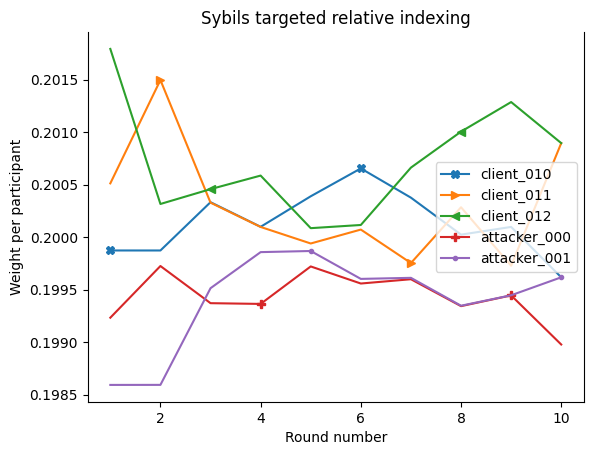

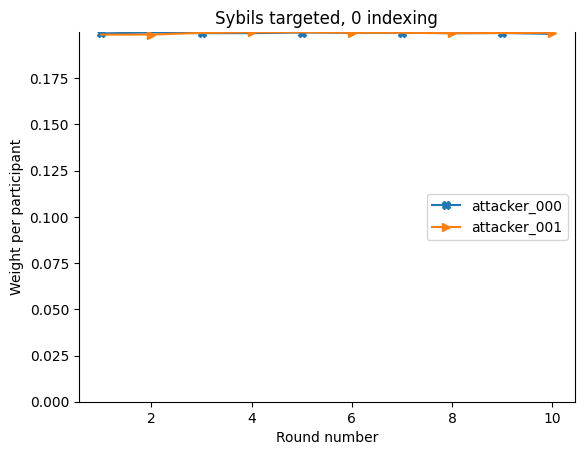

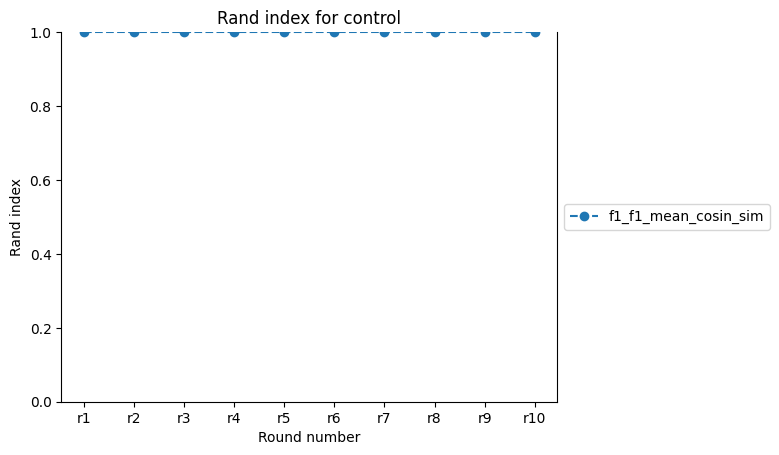

('Miss rate : 0.17398869073510223%', 'Detection rate :99.8260113092649%')


In [ ]:
p ="../multirun/2023-09-08/09-15-13/+scenario_target=targeted,scenario_attacker=stealth,scenario_distribution=sybils_min"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")
print(get_missrate_percent(p,"botiot","Reconnaissance"))

### untargeted

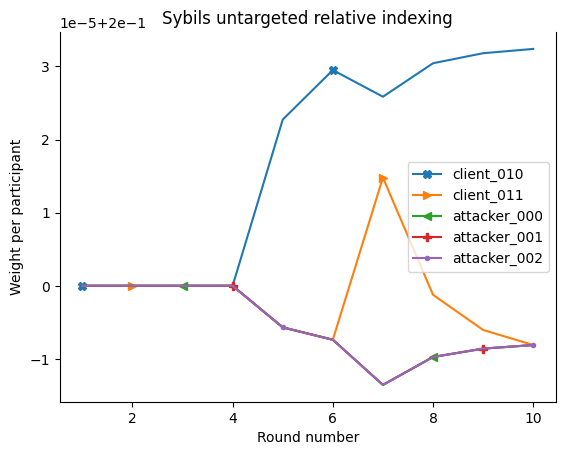

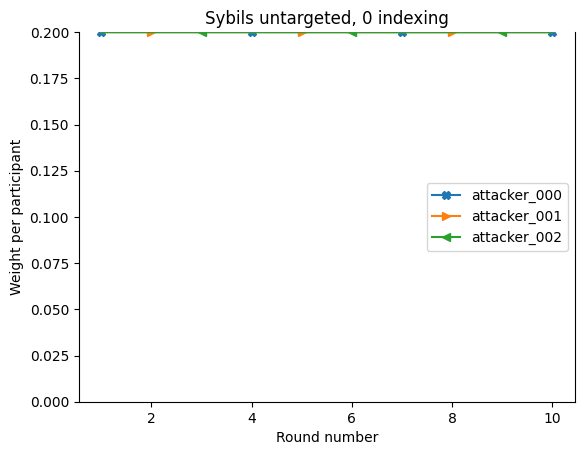

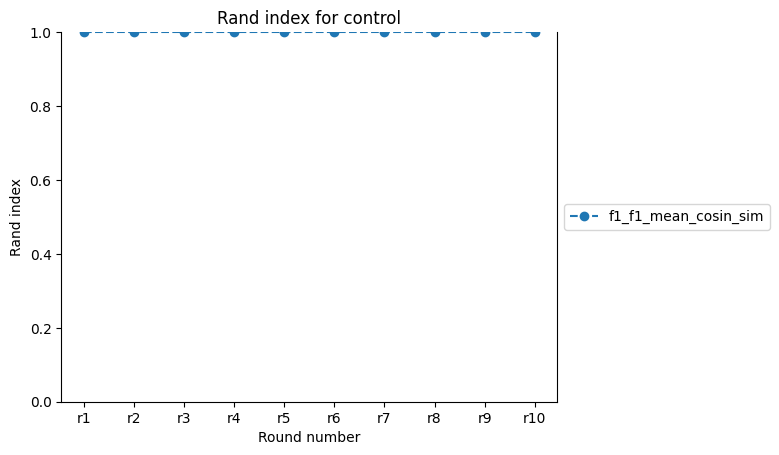

In [ ]:
p ="../multirun/2023-08-25/10-50-55/scenario_attacker=increment,scenario_distribution=sybils,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Decrement

## lone

### targeted

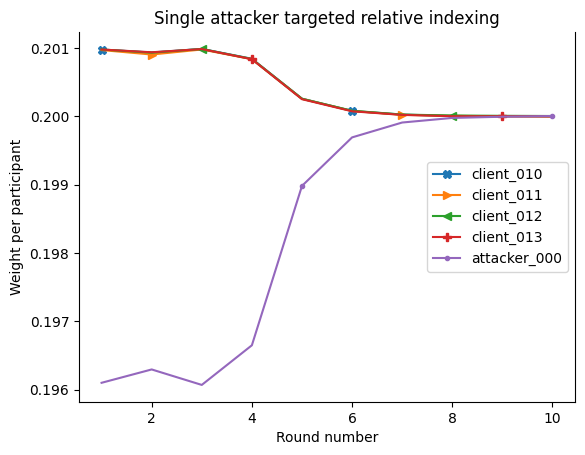

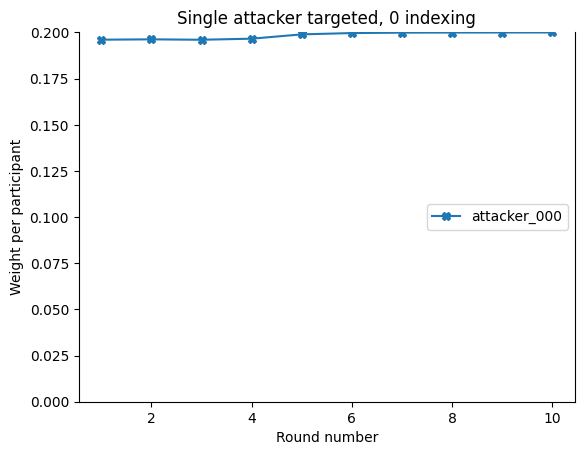

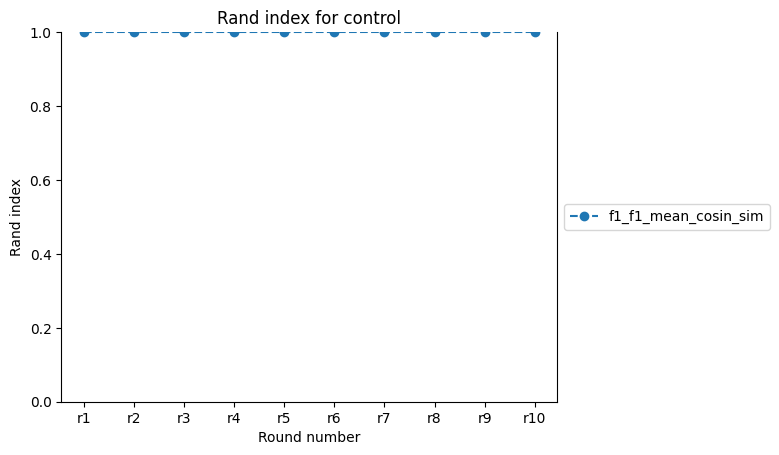

In [ ]:
p ="../multirun/2023-08-28/15-47-25/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=decrement,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

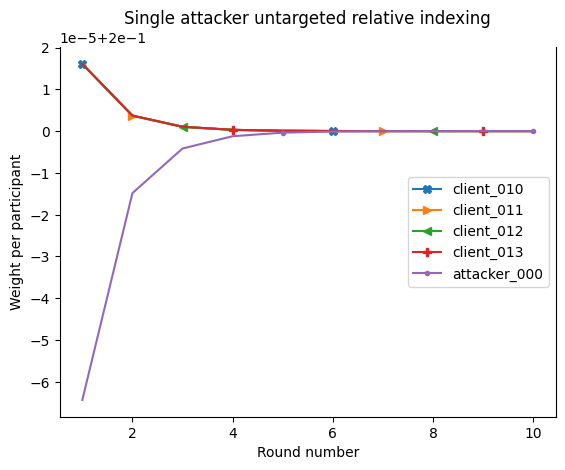

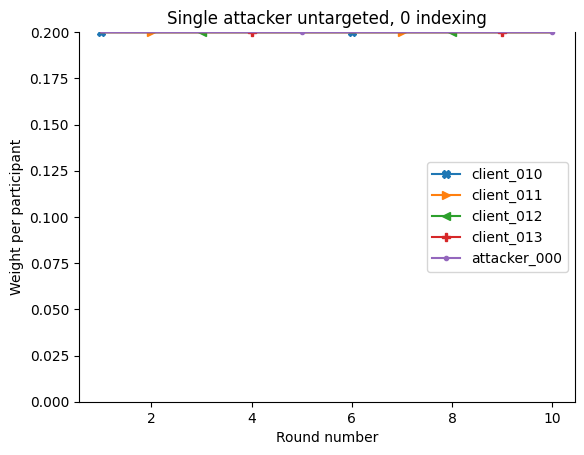

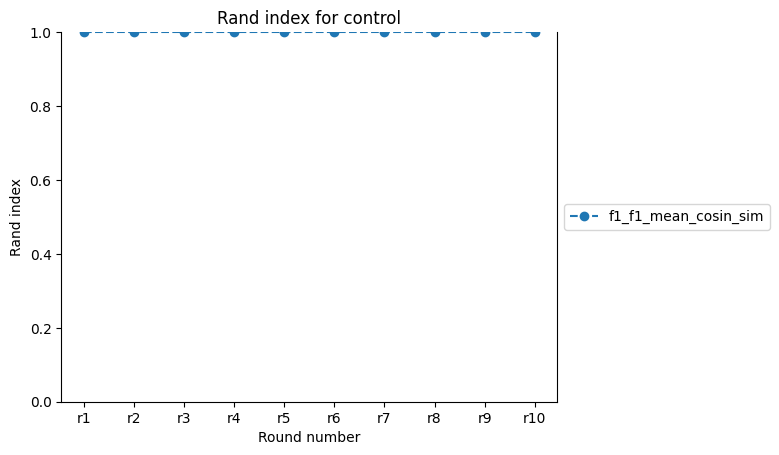

In [ ]:
p ="../multirun/2023-08-22/14-47-05/scenario_attacker=decrement,scenario_distribution=lone,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

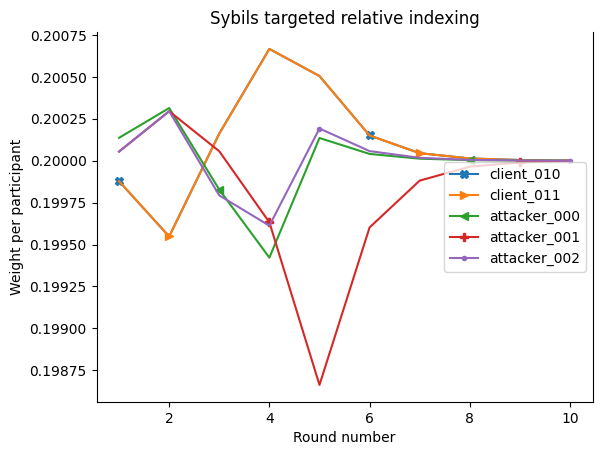

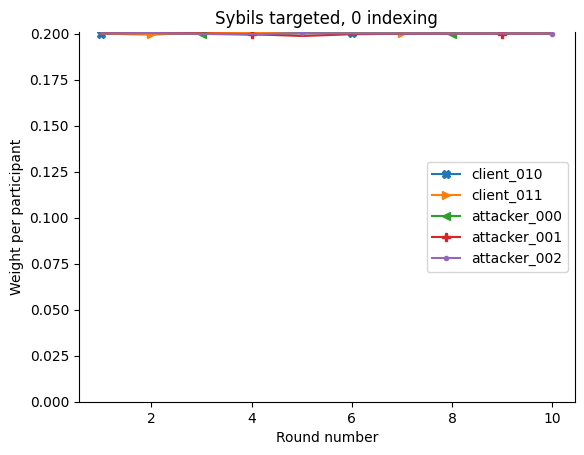

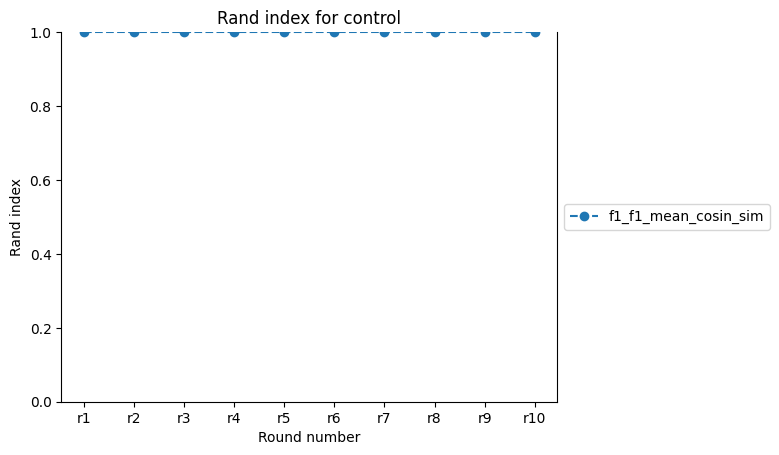

In [ ]:
p ="../multirun/2023-08-25/10-50-55/scenario_attacker=decrement,scenario_distribution=sybils,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

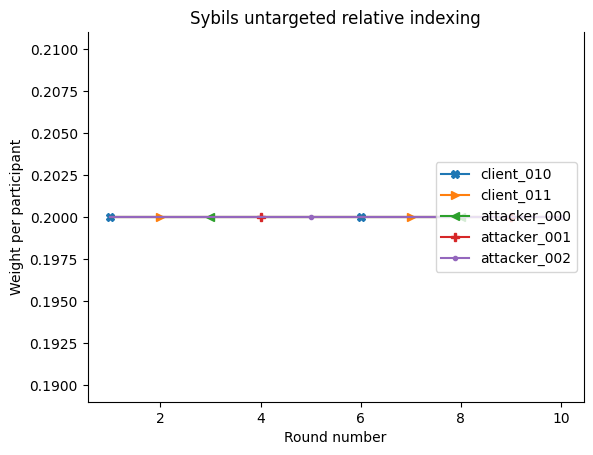

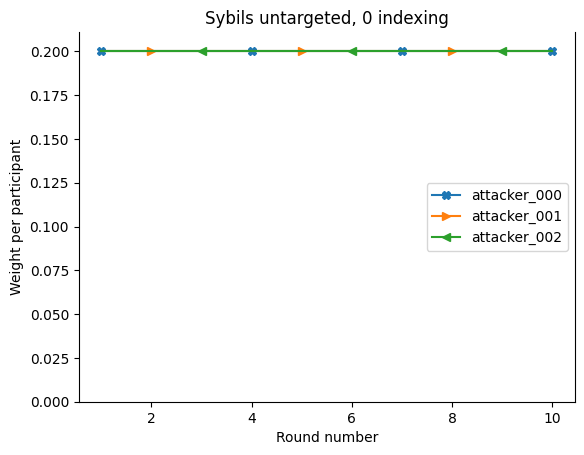

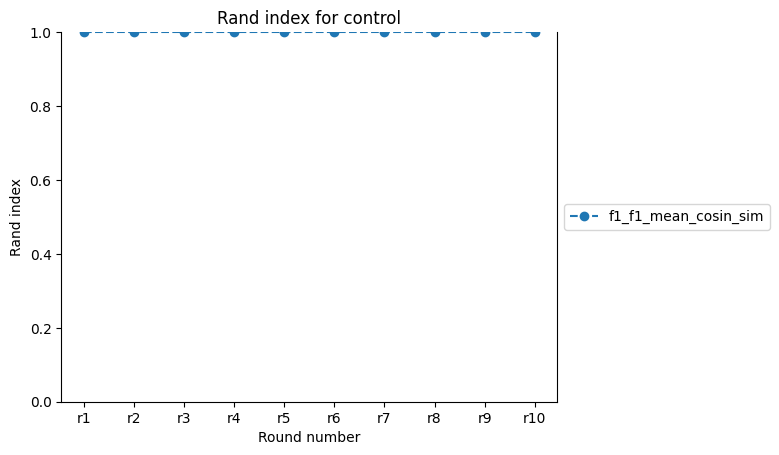

In [ ]:
p ="../multirun/2023-08-25/10-50-55/scenario_attacker=decrement,scenario_distribution=sybils,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Stealth

## lone

### targeted

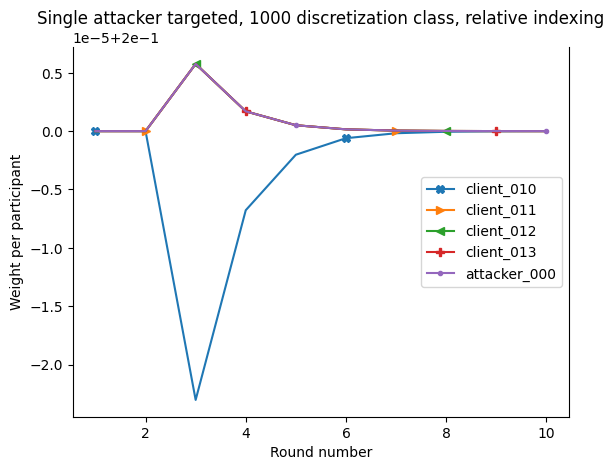

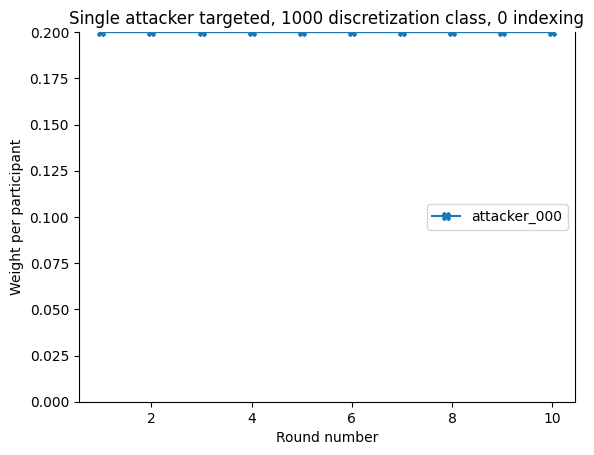

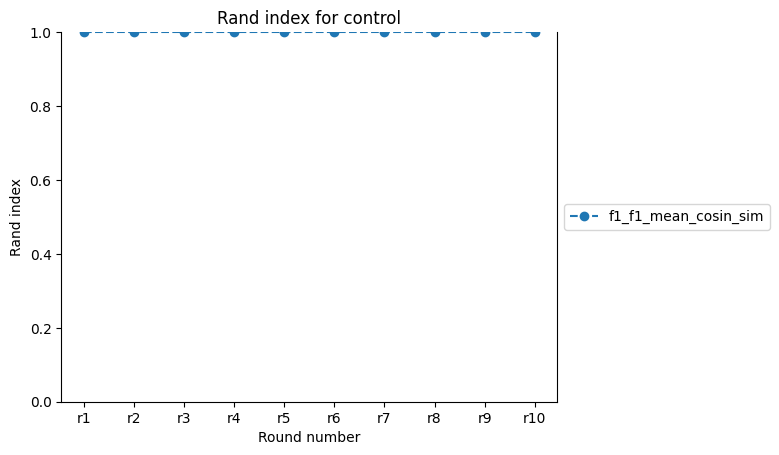

In [ ]:
p ="../multirun/2023-08-22/14-47-05/scenario_attacker=stealth,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted, 1000 discretization class, relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 1000 discretization class, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

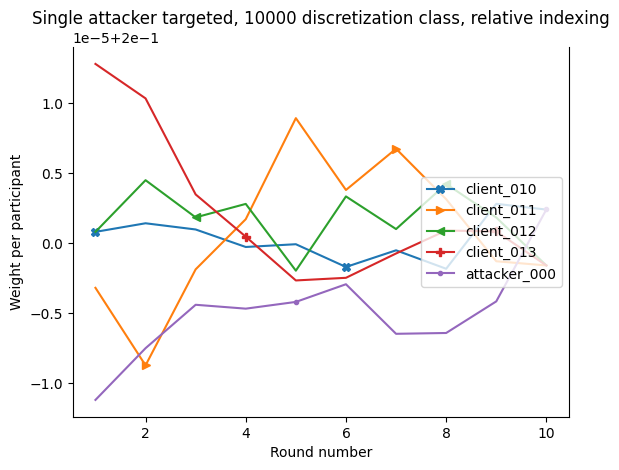

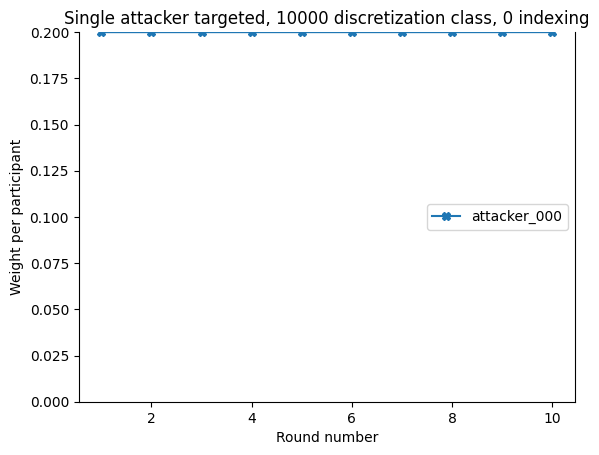

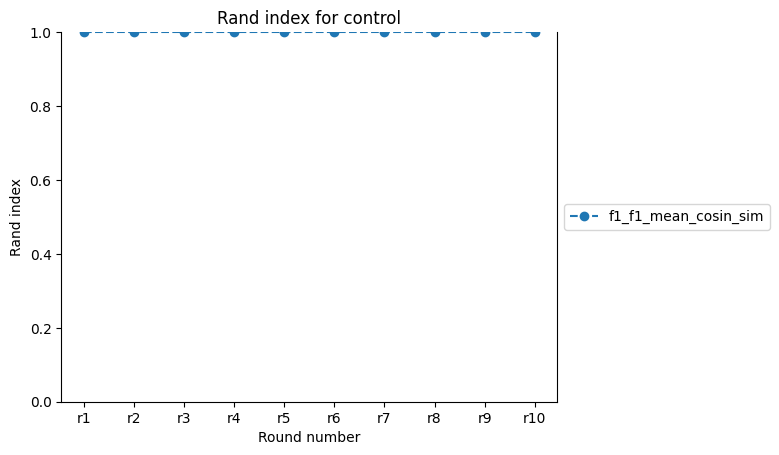

In [ ]:
p ="../multirun/2023-08-28/09-57-56/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=stealth,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted, 10000 discretization class, relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 10000 discretization class, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

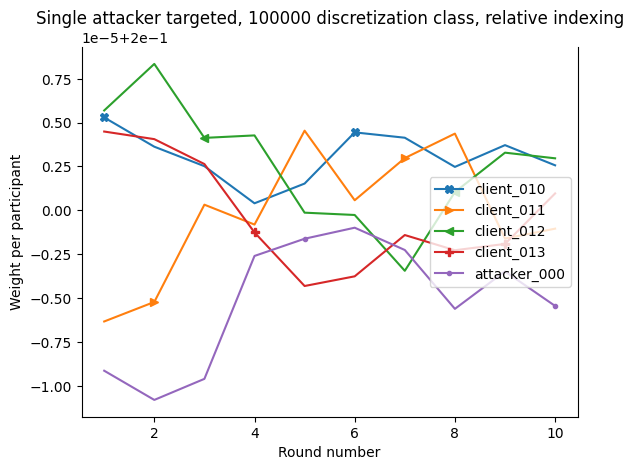

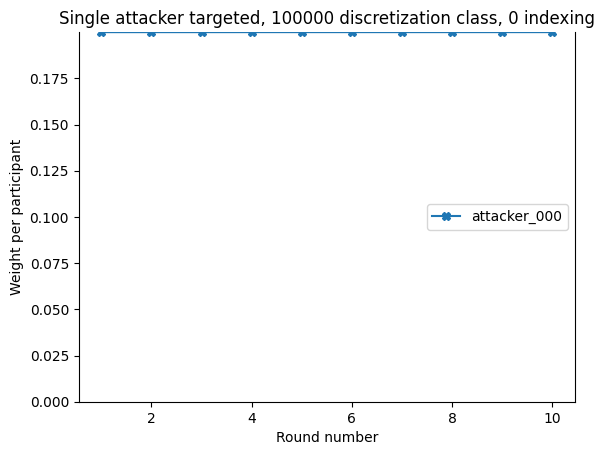

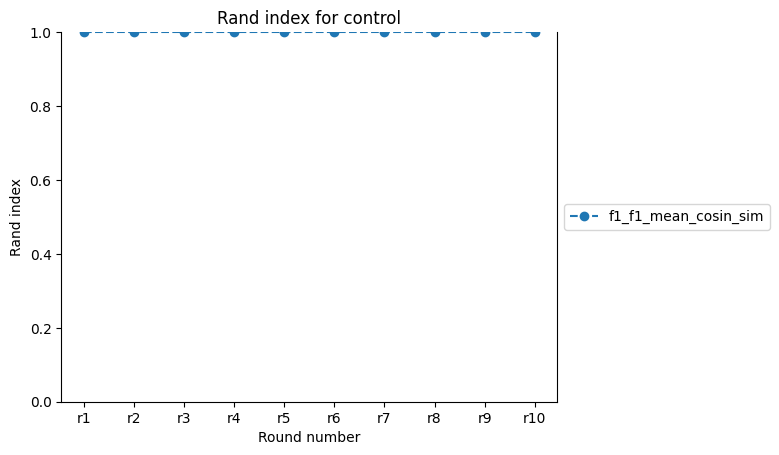

In [ ]:
p ="../multirun/2023-08-28/09-57-56/archi.strategy.reputation_system.class_nb=100000,scenario_attacker=stealth,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted, 100000 discretization class, relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 100000 discretization class, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Redemption

## lone

### targeted

Takeaway : 
    - The reputation system behave as expected by 1. identifying the attacker and 2.reducing the difference begining on round 3 (when the atttacker have once again a normal dataset). 

Further tests : 
    - Testing with lambda = 0 would allow to see if the fading is only due to the history. 


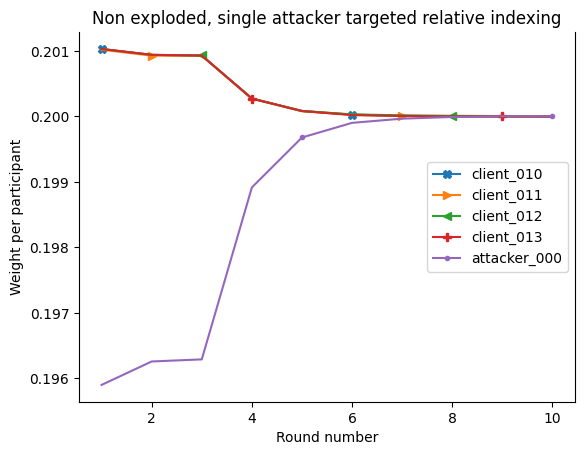

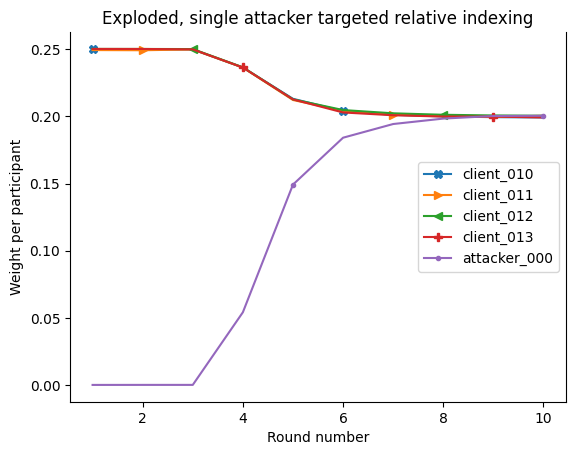

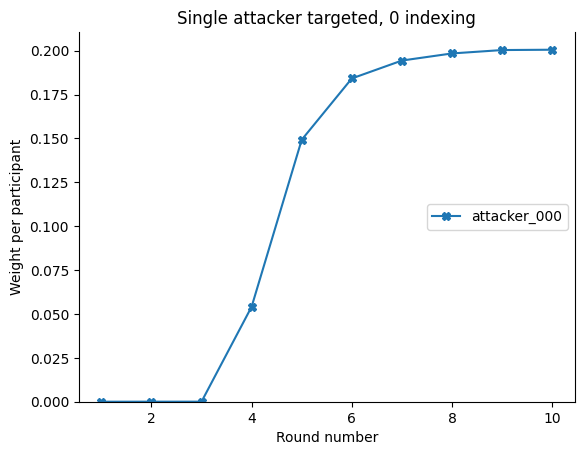

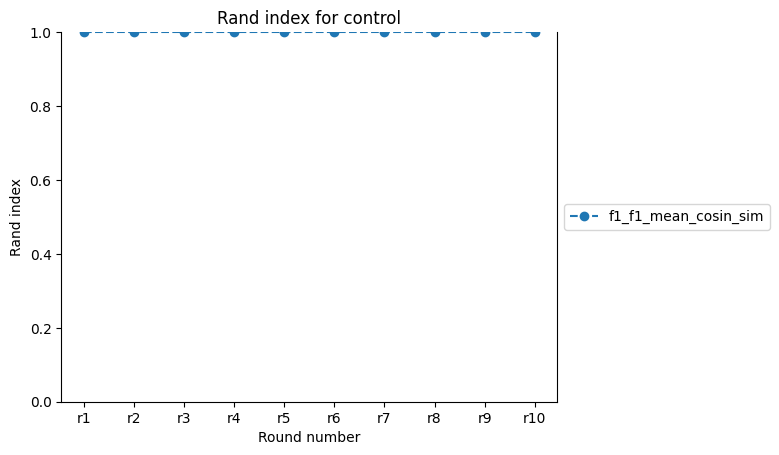

In [ ]:
p_short_memory ="../multirun/2023-09-08/09-15-13/+scenario_target=targeted,scenario_attacker=redemption,scenario_distribution=lone"
plot_weights_in_cluster(p_short_memory,dataset="botiot", exploded=False, title="Non exploded, single attacker targeted relative indexing")
plot_weights_in_cluster(p_short_memory,dataset="botiot", title="Exploded, single attacker targeted relative indexing")
plot_weights_in_cluster(p_short_memory,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

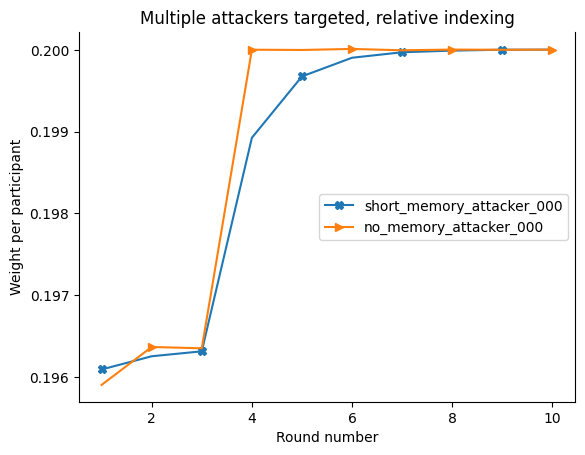

In [ ]:
p_no_memory = "../multirun/2023-08-29/18-39-00/archi.strategy.reputation_system.class_nb=10000,archi.strategy.reputation_system.lmbd=0,scenario_attacker=redemption,scenario_distribution=lone,scenario_target=targeted"
# plot_weights_in_cluster (p_short_memory,p_no_memory,dataset="botiot", title="Multiple attackers targeted, relative indexing", labels = ("short_memory","no_memory"))
plot_weights_in_cluster (p_short_memory,p_no_memory,dataset="botiot", title="Multiple attackers targeted, relative indexing", attacker_only=True, labels = ("short_memory","no_memory"))


### untargeted

In [ ]:
p ="../multirun/2023-08-22/14-47-05/scenario_attacker=loud,scenario_distribution=lone,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

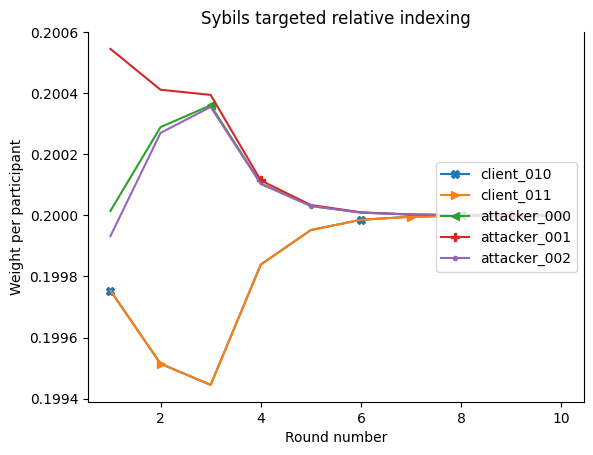

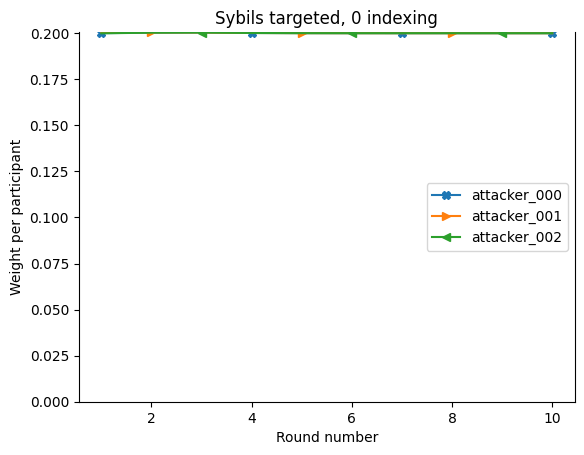

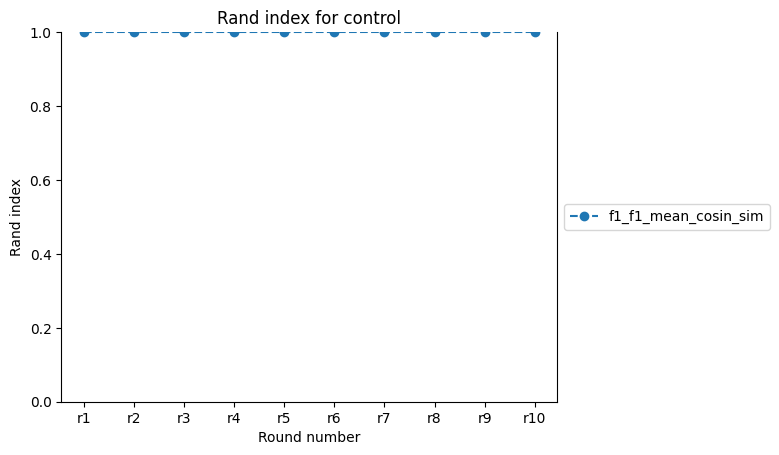

In [ ]:
p ="../multirun/2023-08-25/10-50-55/scenario_attacker=redemption,scenario_distribution=sybils,scenario_target=targeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

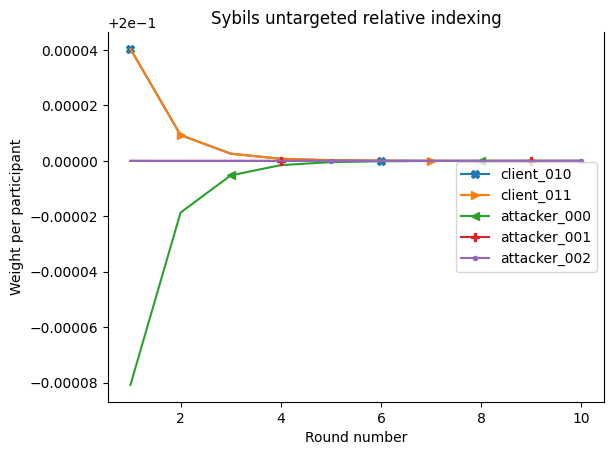

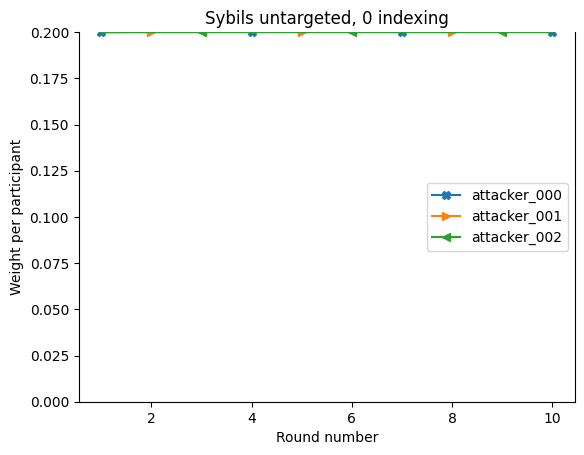

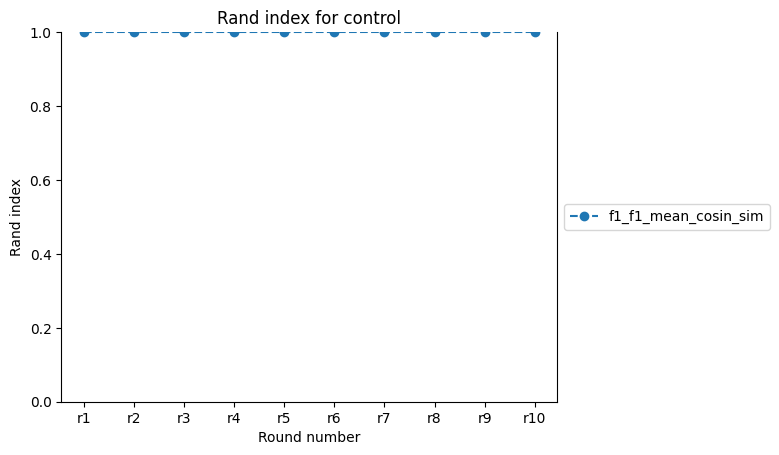

In [ ]:
p ="../multirun/2023-08-25/10-50-55/scenario_attacker=redemption,scenario_distribution=sybils,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Oscillatory

## Lone

### Targeted

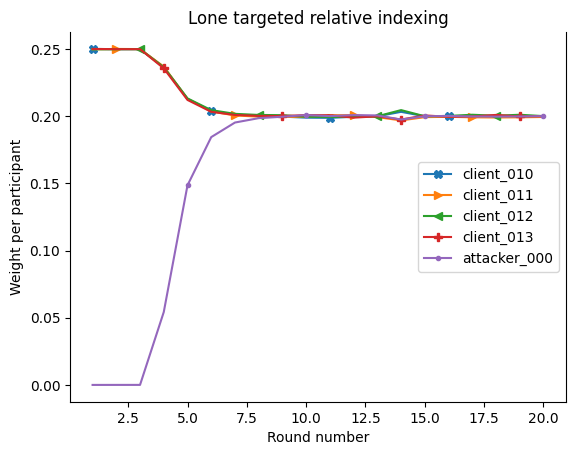

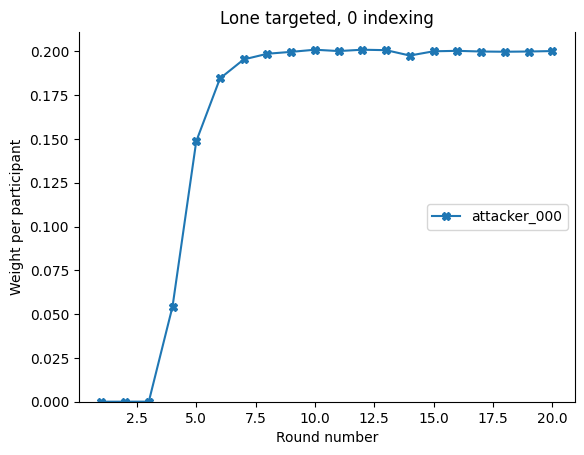

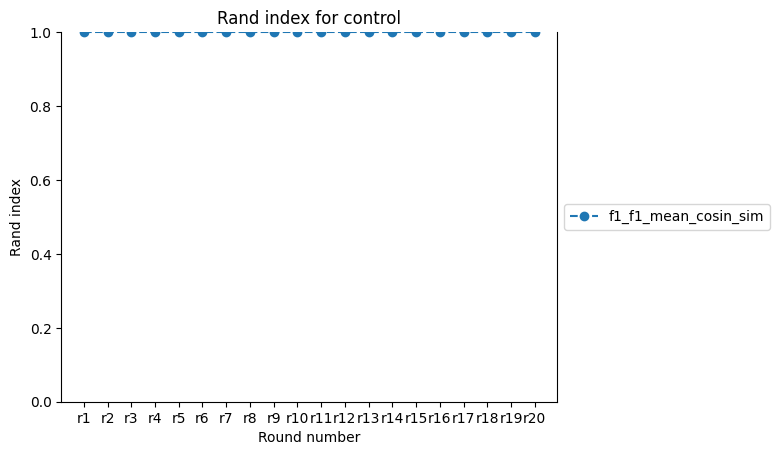

In [7]:
p ="./trustfids/scenario/lone/targeted/oscillatory"
late= "./outputs/2023-09-22/12-51-35"
plot_weights_in_cluster(p,dataset="botiot",  title="Lone targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",  title="Lone targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

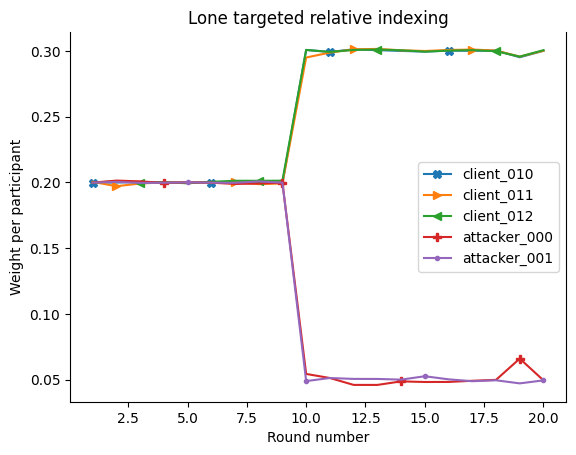

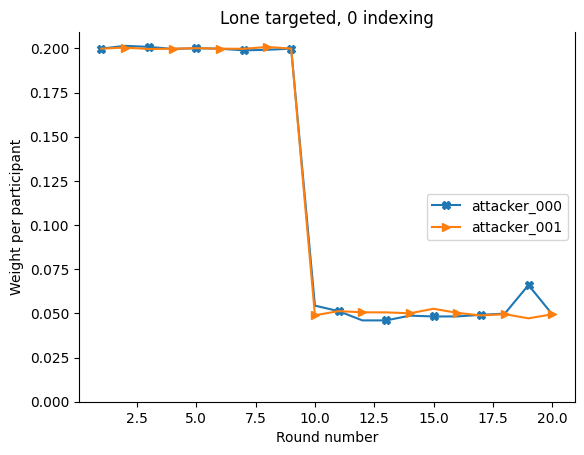

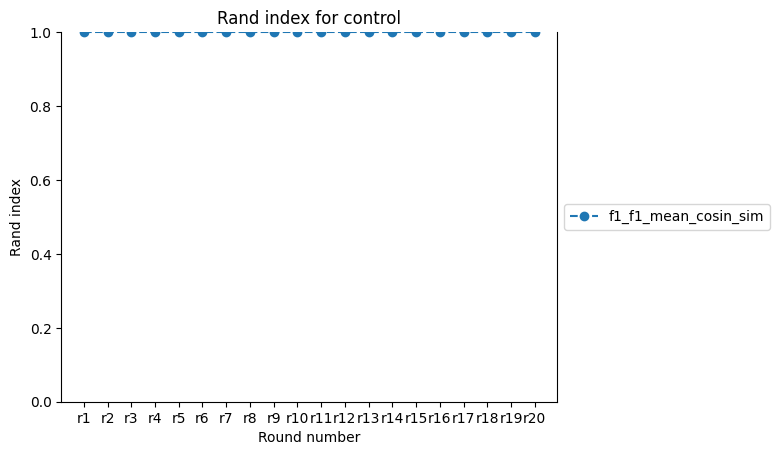

In [6]:
late= "../outputs/2023-09-22/12-51-35"
plot_weights_in_cluster(late,dataset="botiot",  title="Lone targeted relative indexing")
plot_weights_in_cluster(late,dataset="botiot",  title="Lone targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(late, title="Rand index for control")

### Untargeted

In [10]:
p ="./trustfids/scenario/lone/untargeted/oscillatory"
plot_weights_in_cluster(p,dataset="botiot", title="Lone untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Lone untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

NameError: name 'plot_weights_in_cluster' is not defined

## Sybils

### Targeted

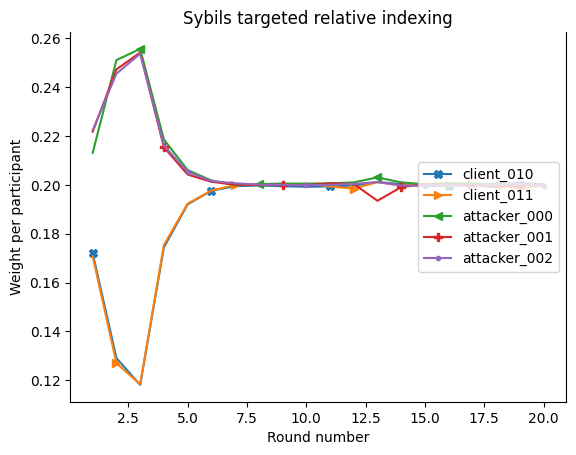

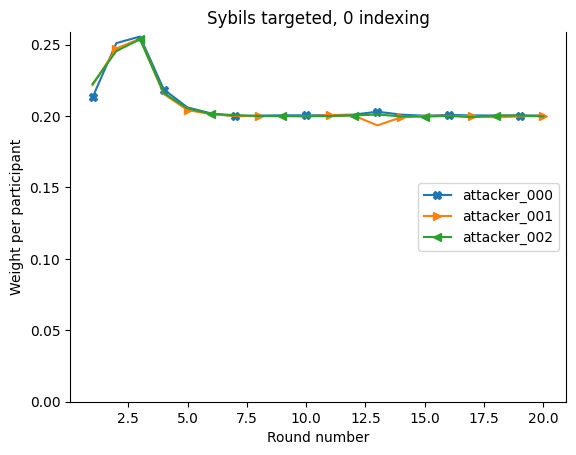

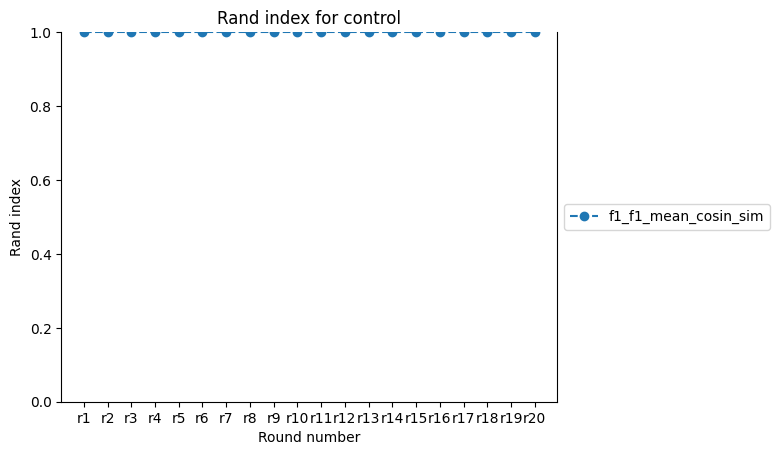

In [5]:
p ="./trustfids/scenario/sybils/targeted/oscillatory"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### Untargeted

In [6]:
p ="../multirun/2023-09-06/17-13-52/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=oscillatory,scenario_distribution=sybils,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

FileNotFoundError: [Errno 2] No such file or directory: '../multirun/2023-09-06/17-13-52/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=oscillatory,scenario_distribution=sybils,scenario_target=untargeted/client_weights_exploded.json'

## Sybils in minority

### Targeted

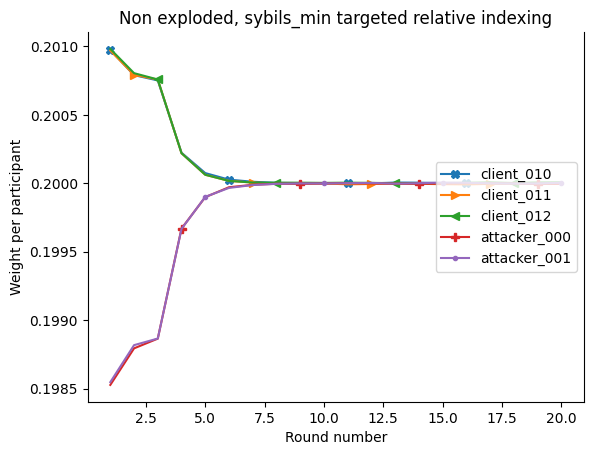

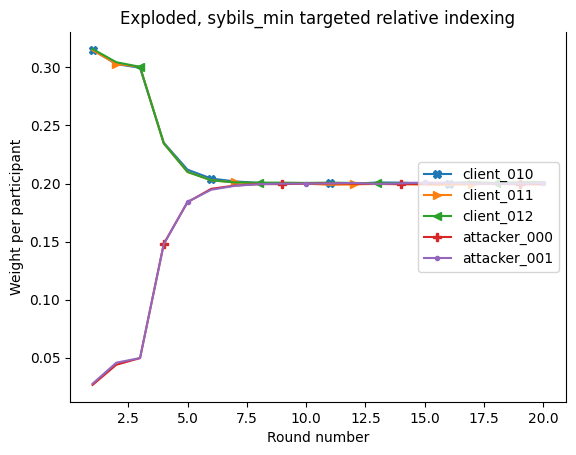

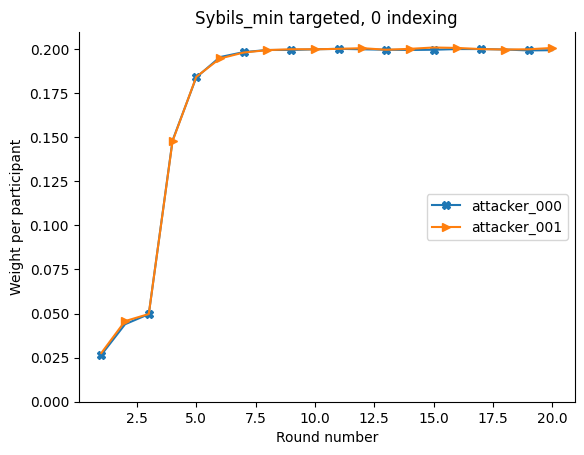

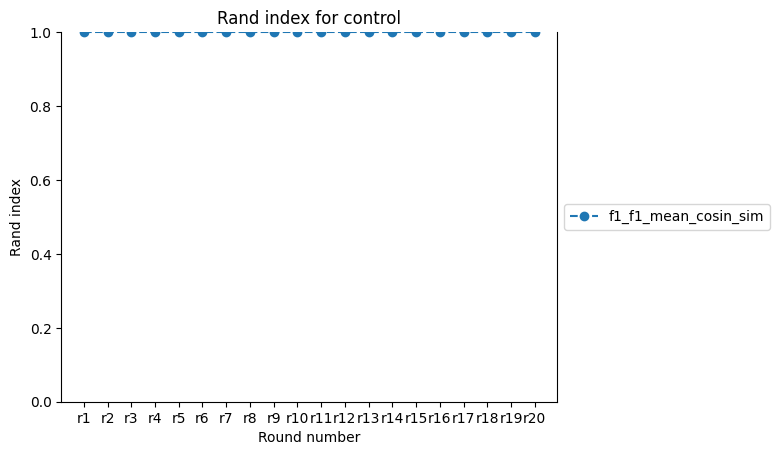

In [6]:
p = "./trustfids/scenario/sybils_min/oscillatory"
plot_weights_in_cluster(p,dataset="botiot", title="Non exploded, sybils_min targeted relative indexing",exploded=False)
plot_weights_in_cluster(p,dataset="botiot", title="Exploded, sybils_min targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils_min targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### Untargeted

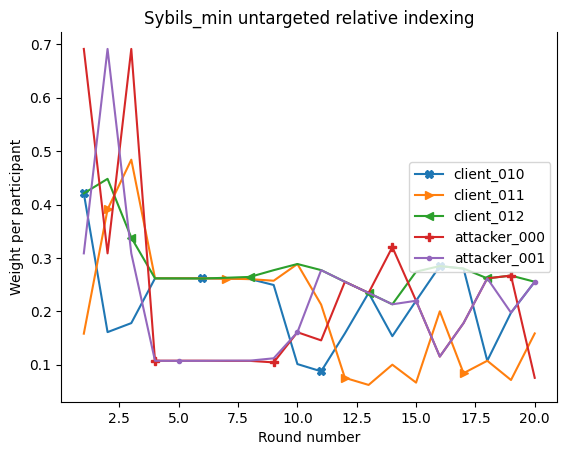

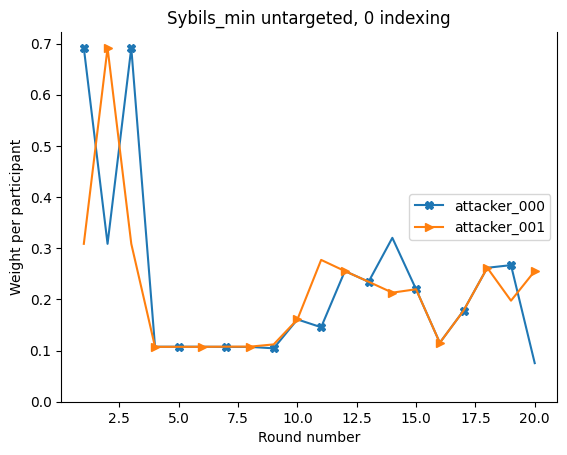

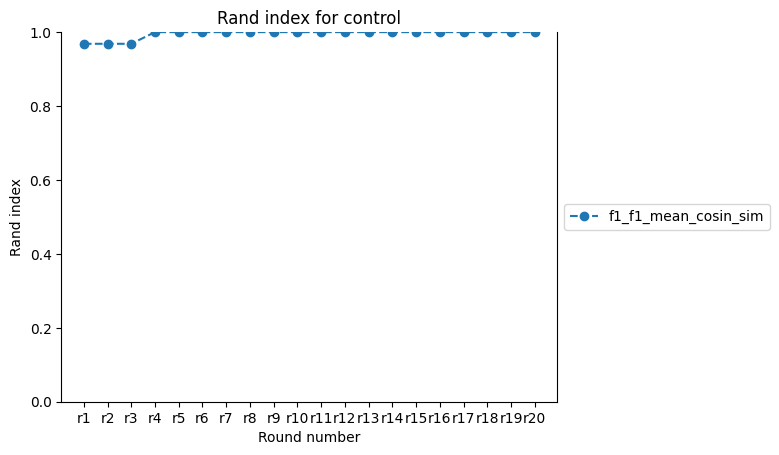

In [ ]:
p ="../multirun/2023-09-06/17-13-52/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=oscillatory,scenario_distribution=sybils_min,scenario_target=untargeted"
plot_weights_in_cluster(p,dataset="botiot", title="Sybils_min untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils_min untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

# Stealth

## lone

### targeted

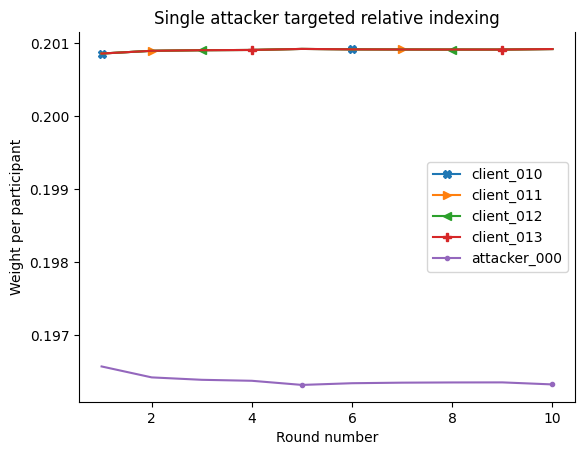

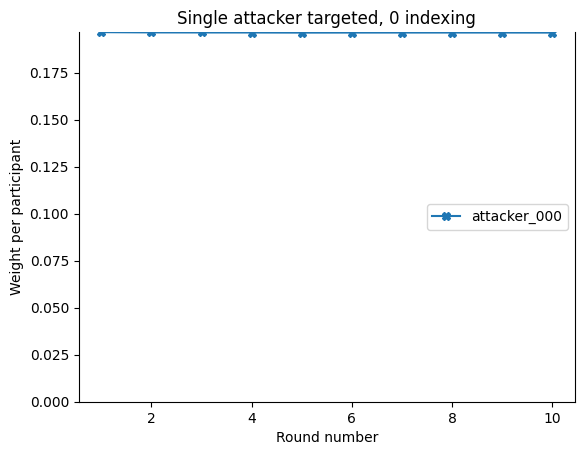

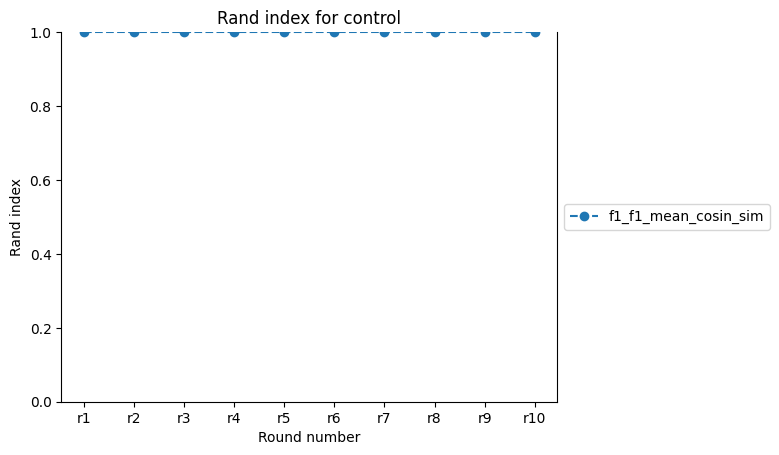

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Single attacker untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

## Sybils

### targeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils targeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils targeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

### untargeted

In [ ]:
p =""
plot_weights_in_cluster(p,dataset="botiot", title="Sybils untargeted relative indexing")
plot_weights_in_cluster(p,dataset="botiot",title="Sybils untargeted, 0 indexing", zero_indexed=True, attacker_only=True)
plot_rand_comparison(p, title="Rand index for control")

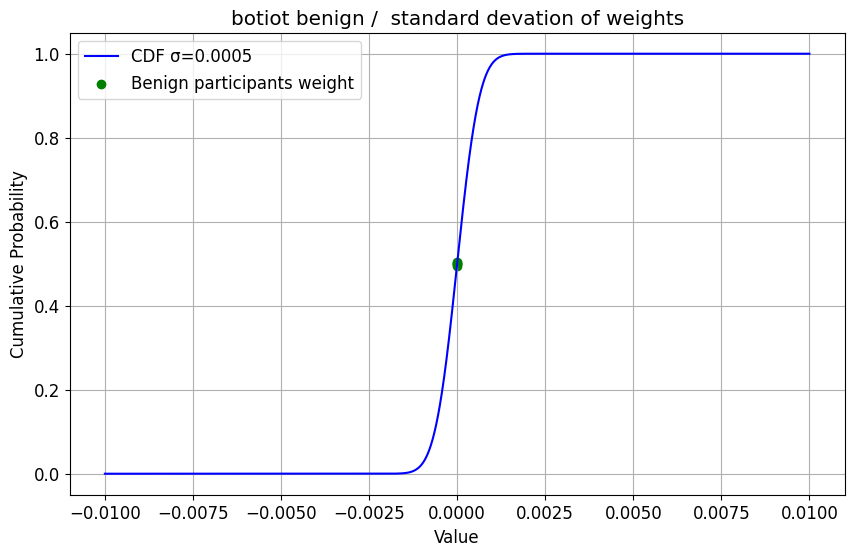

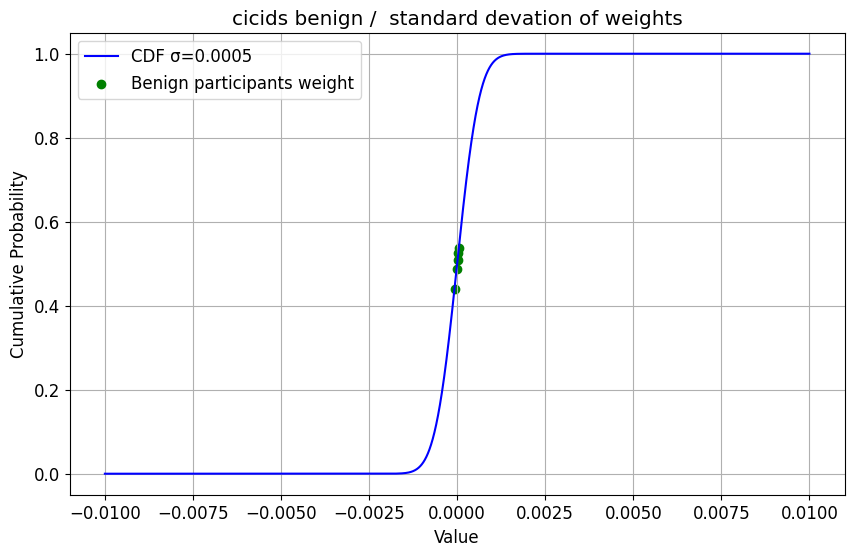

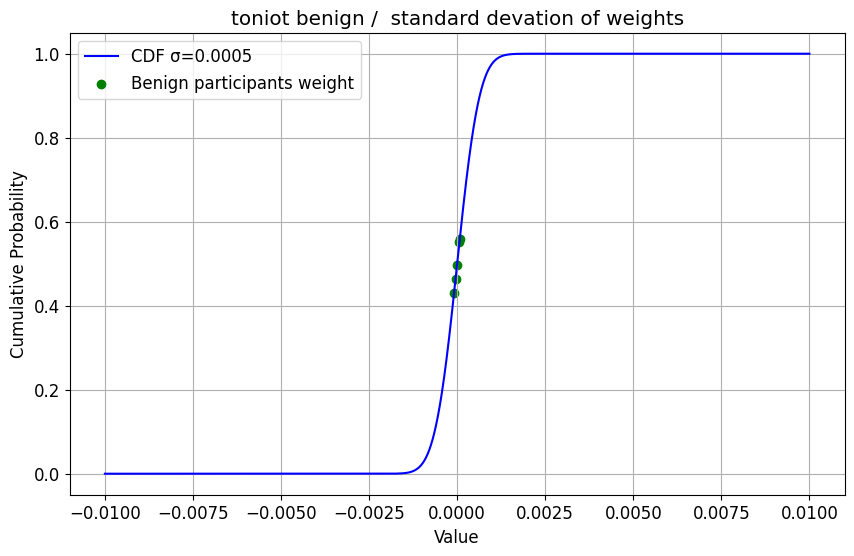

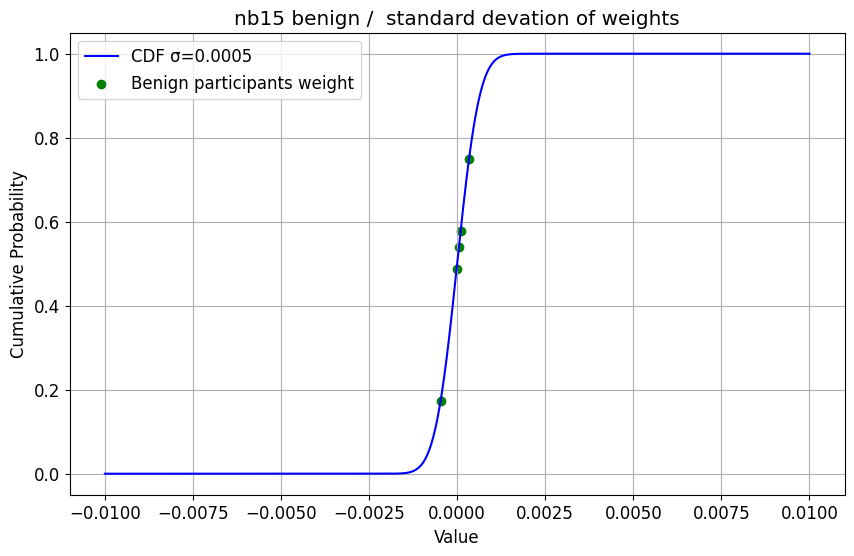

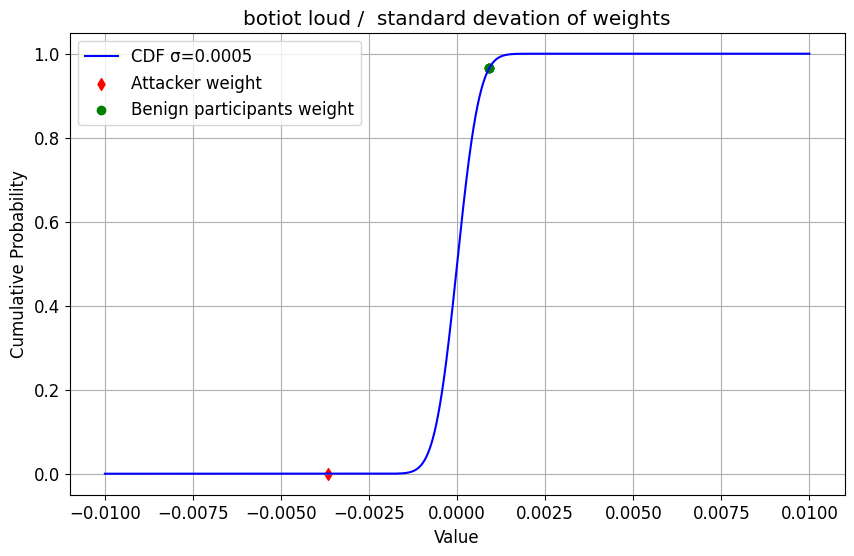

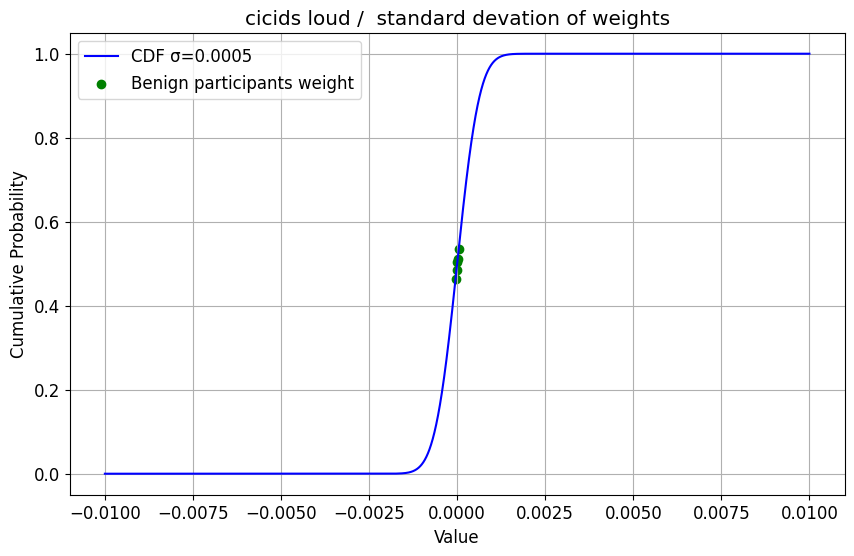

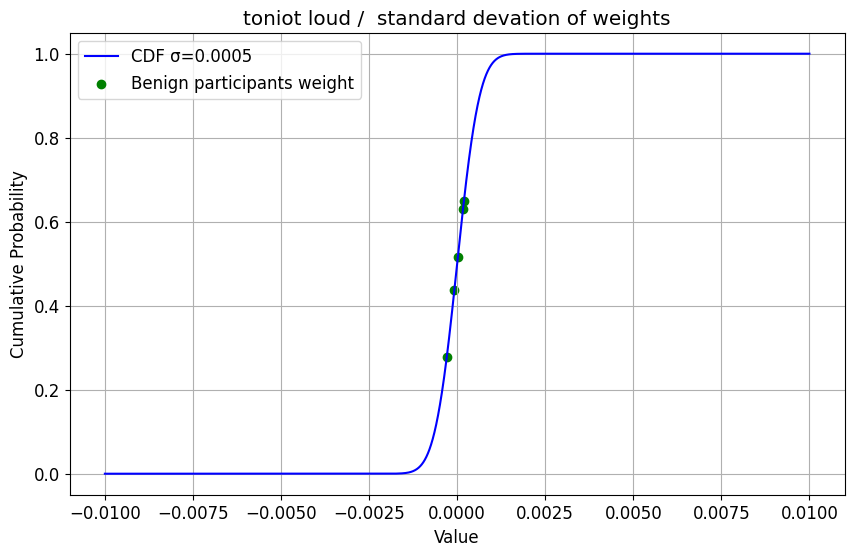

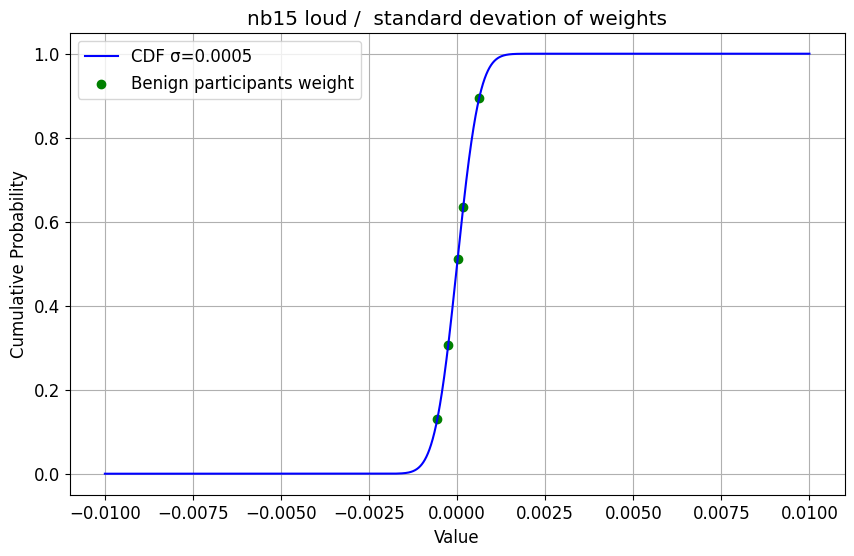

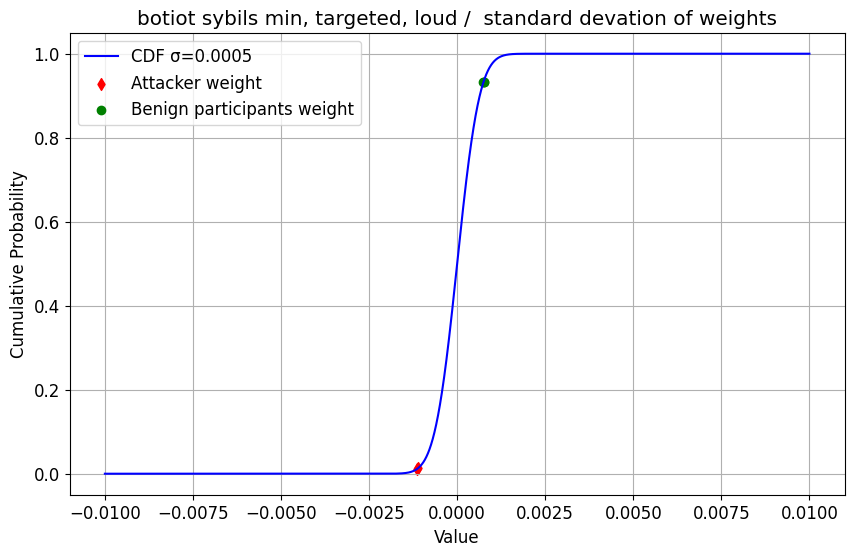

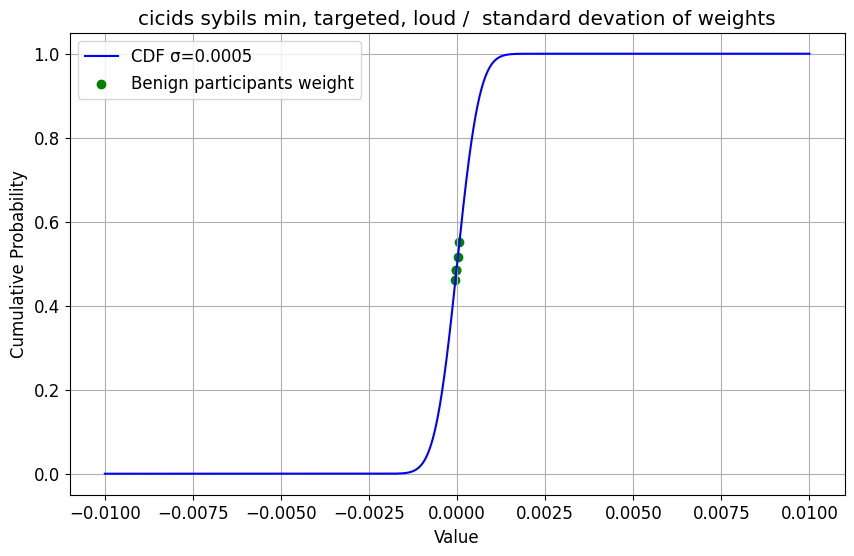

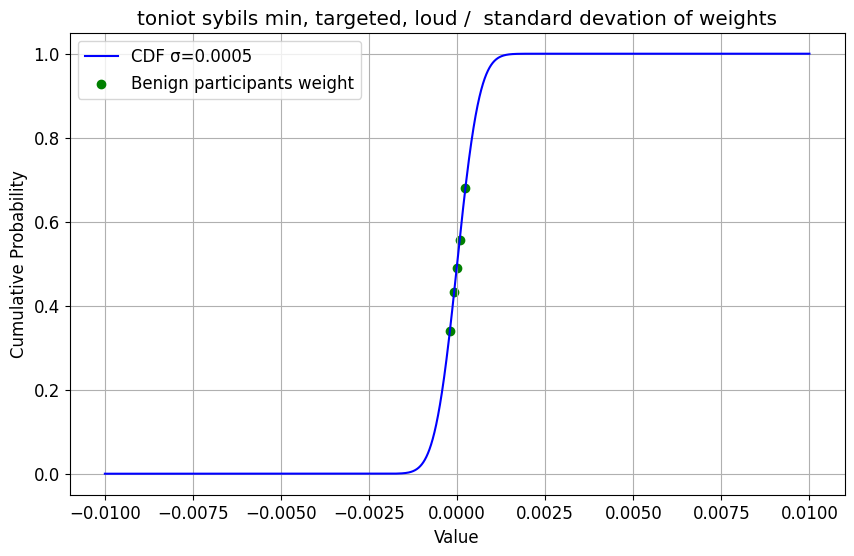

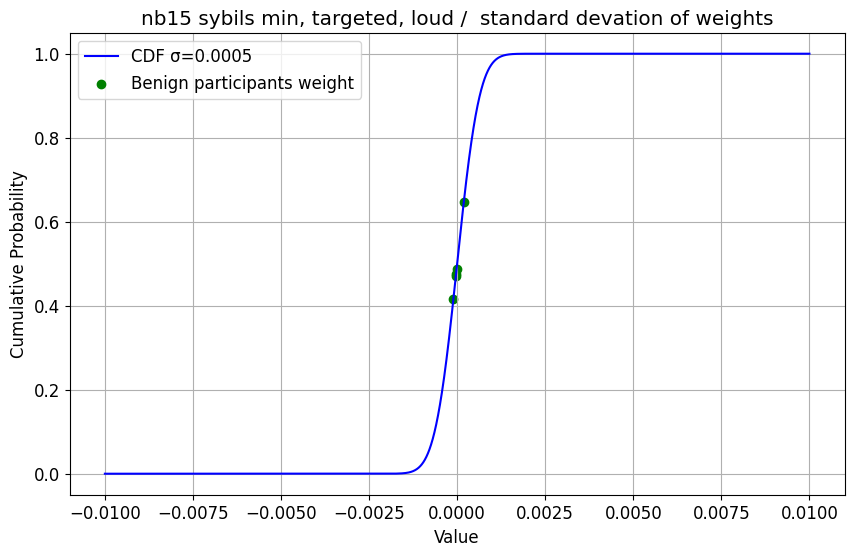

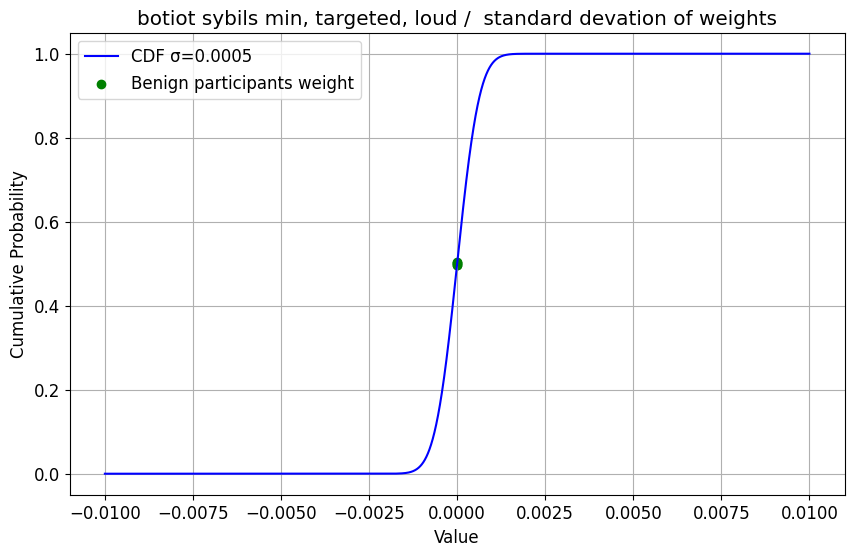

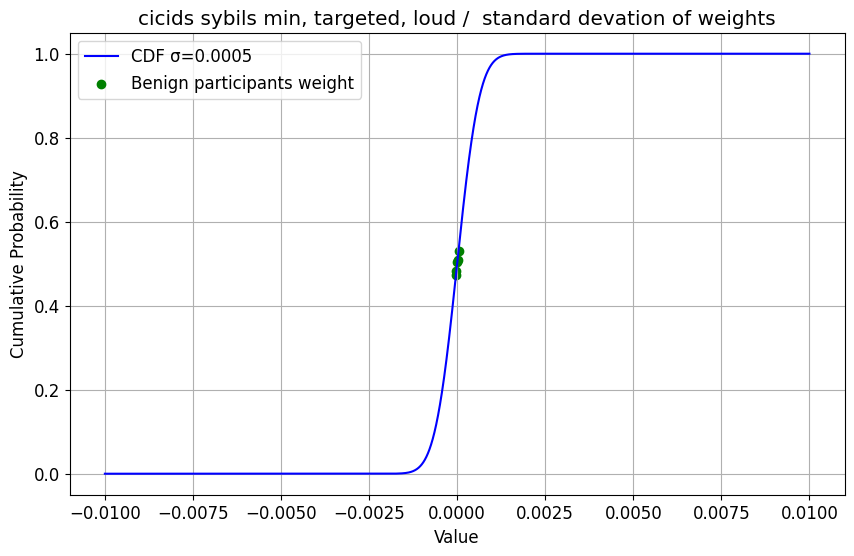

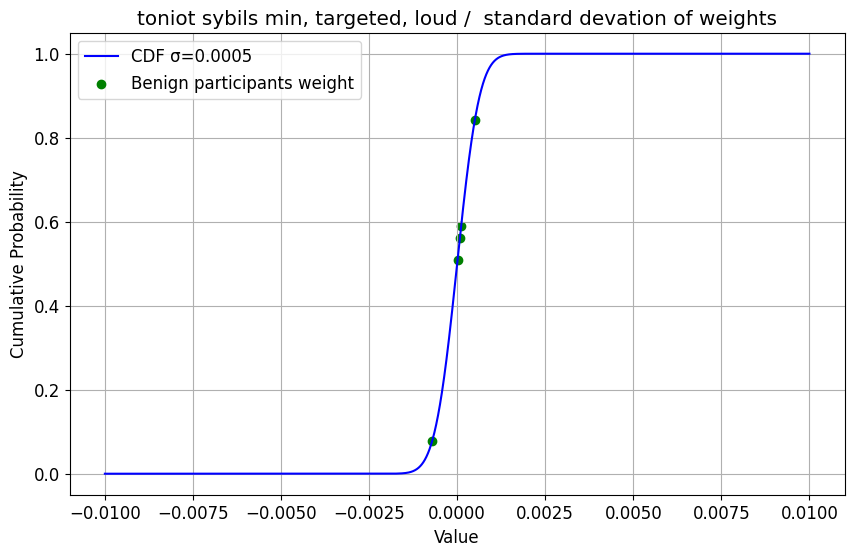

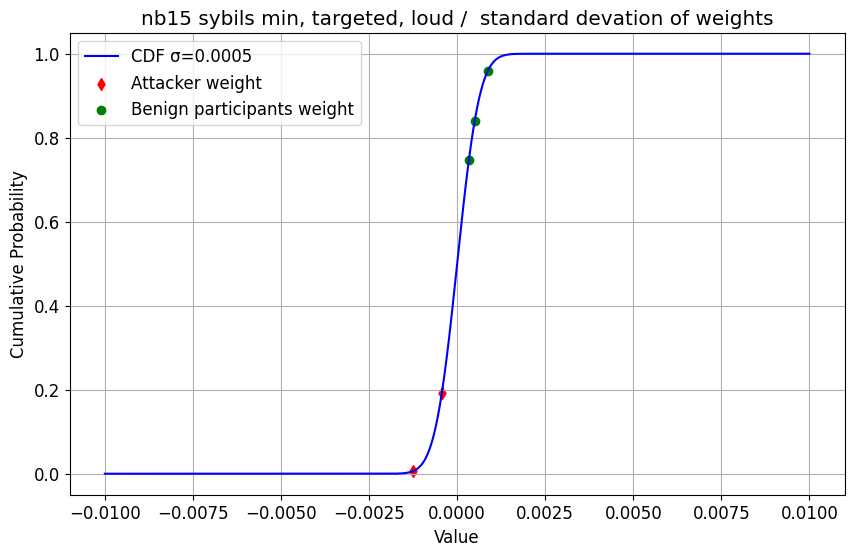

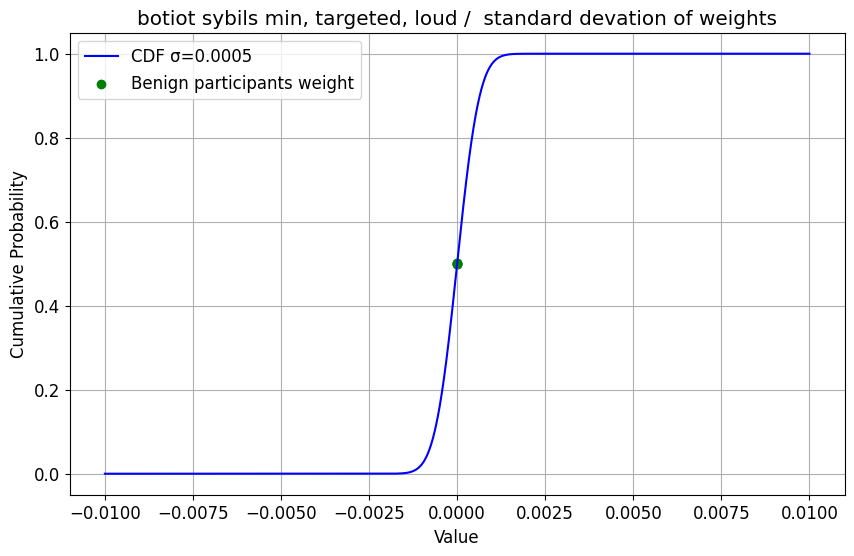

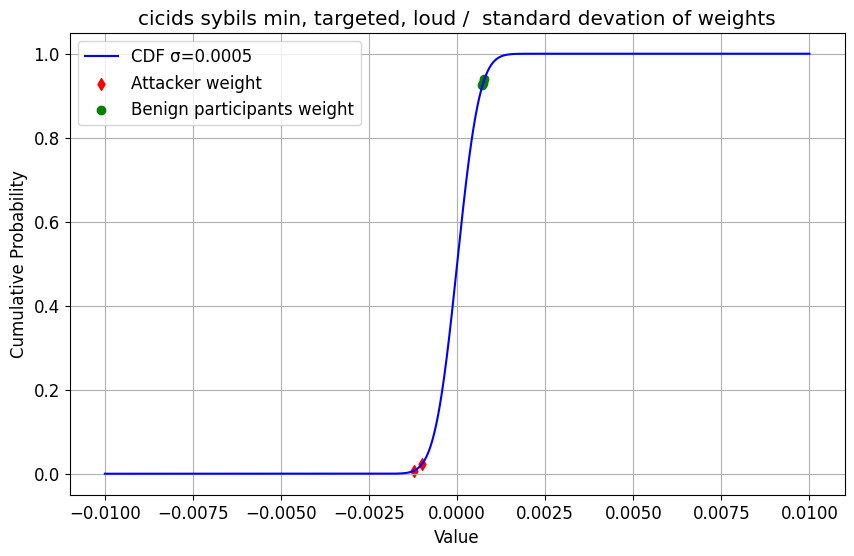

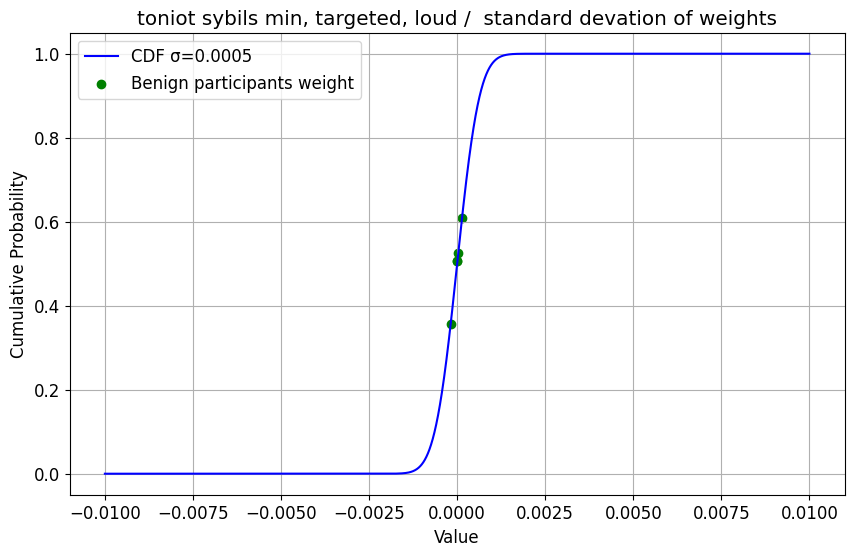

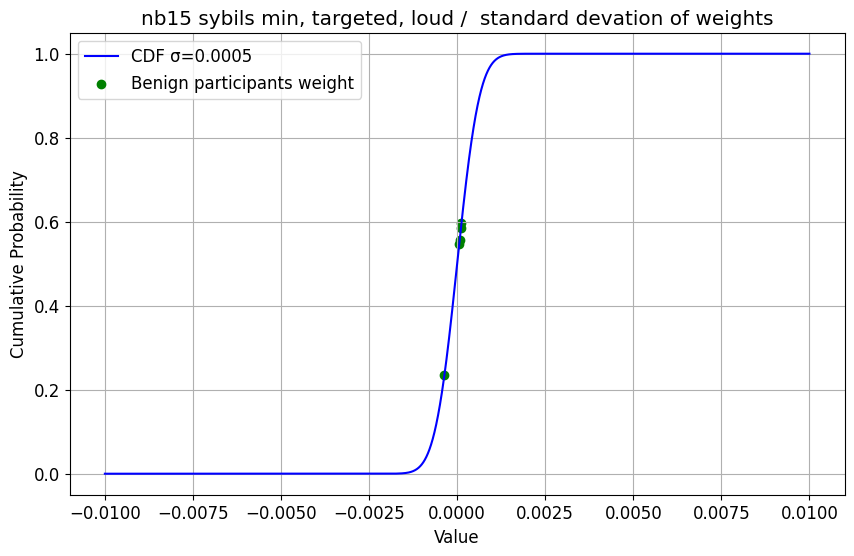

In [25]:
from trustfids.utils.plot_cdf import participants_over_cdf

# p= "../multirun/2023-08-28/15-47-25/archi.strategy.reputation_system.class_nb=10000,scenario_attacker=increment,scenario_distribution=lone,scenario_target=targeted"
datasets = ["botiot","cicids","toniot","nb15"]

p = "./trustfids/scenario/benign"
for d in datasets: 
    participants_over_cdf(dir=p,dataset=d, sigma= 0.0005, title= "benign")
    
p = "./trustfids/scenario/lone/targeted/loud"
for d in datasets: 
    participants_over_cdf(dir=p,dataset=d, sigma= 0.0005, title= "loud")
 

p = "../multirun/2023-09-07/17-39-31/scenario_attacker=loud,scenario_distribution=sybils_min_botiot_targeted"
for d in datasets: 
    participants_over_cdf(dir=p,dataset=d, sigma= 0.0005, title= "sybils min, targeted, loud")

p = "../multirun/2023-09-07/17-39-31/scenario_attacker=loud,scenario_distribution=sybils_min_nb15_targeted"
for d in datasets: 
    participants_over_cdf(dir=p,dataset=d, sigma= 0.0005, title= "sybils min, targeted, loud")

p = "../multirun/2023-09-07/18-14-46/scenario_attacker=loud,scenario_distribution=sybils_min_cicids_targeted"
for d in datasets: 
    participants_over_cdf(dir=p,dataset=d, sigma= 0.0005, title= "sybils min, targeted, loud")


### Class stripped exploding weight analysis

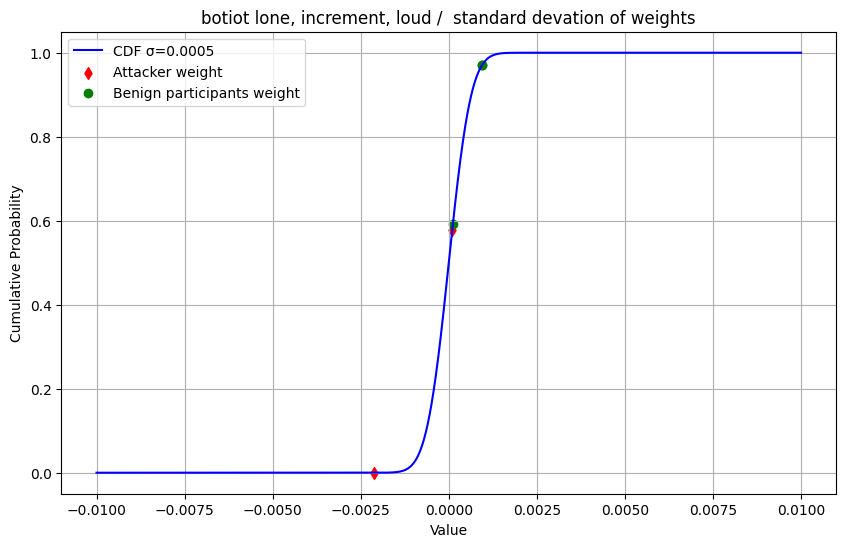

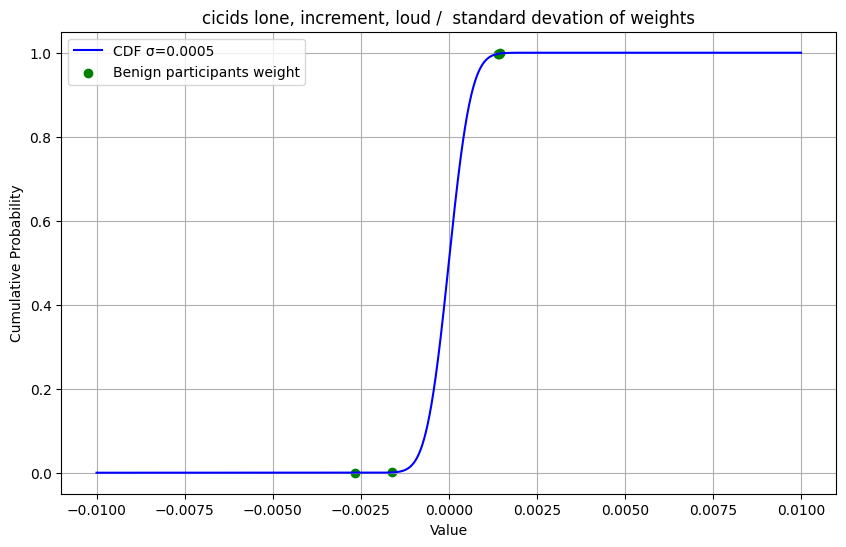

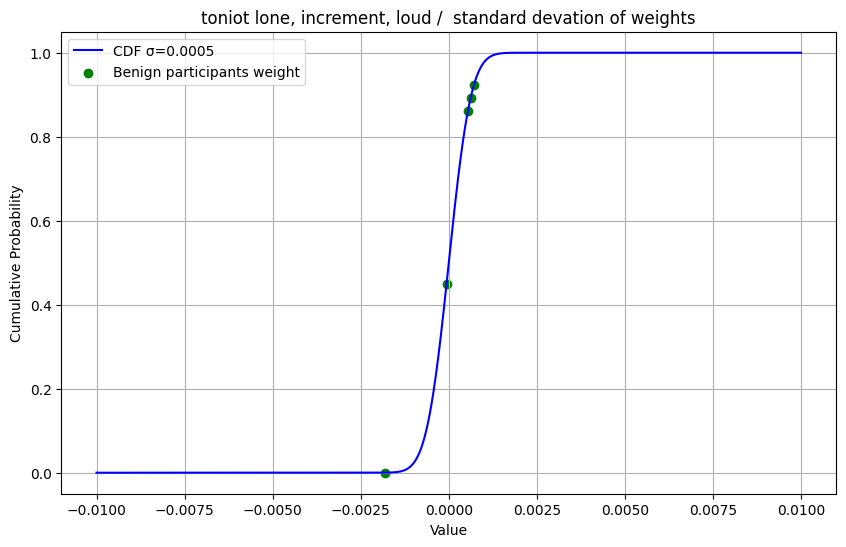

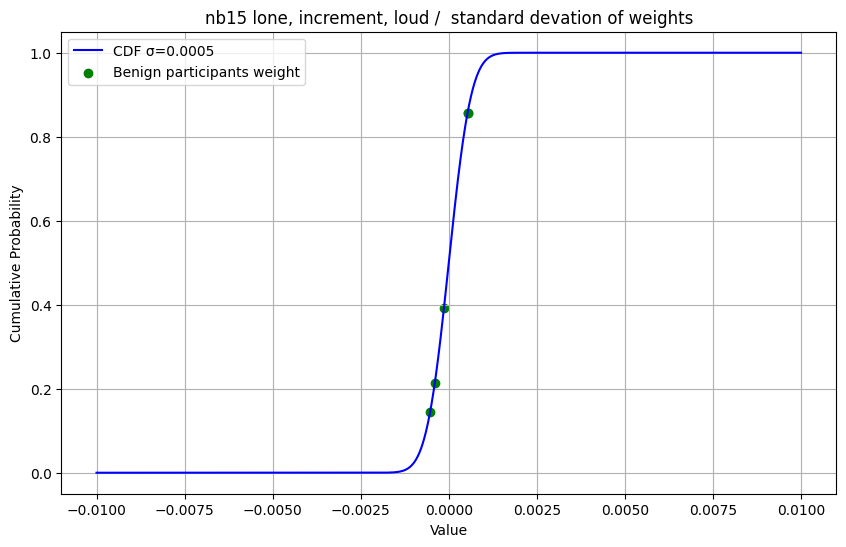

In [7]:
from trustfids.utils.plot_cdf import participants_over_cdf

p= "../outputs/2023-09-25/14-27-40"
datasets = ["botiot","cicids","toniot","nb15"]

for d in datasets: 
    participants_over_cdf(dir=p,dataset=d, sigma= 0.0005, title= "lone, increment, loud")


### Targeted 

Main takeaways : 
- The change of behavior is detected and it have a relative effect on the weight
- HOWEVER 
- This impact is extremely small and is not enough to prevent the poisoning (cross results with the evaluation).

### Lambda = 0.3 (short term memory)

../outputs/2023-07-04/14-01-03
../multirun/2023-07-06/12-26-42/archi.strategy.reputation_system.lmbd=0.8,scenario_attacker=loud,scenario_distribution=lone,scenario_target=targeted


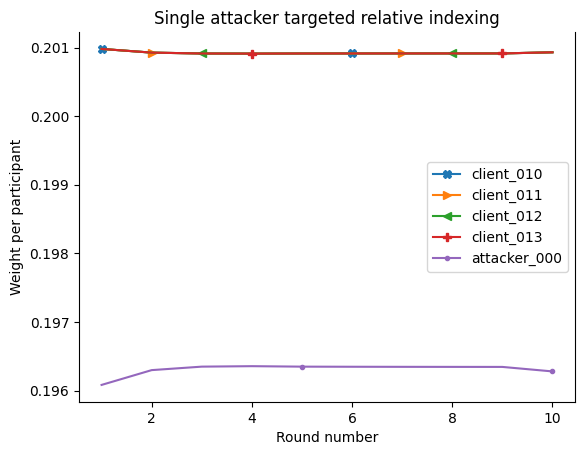

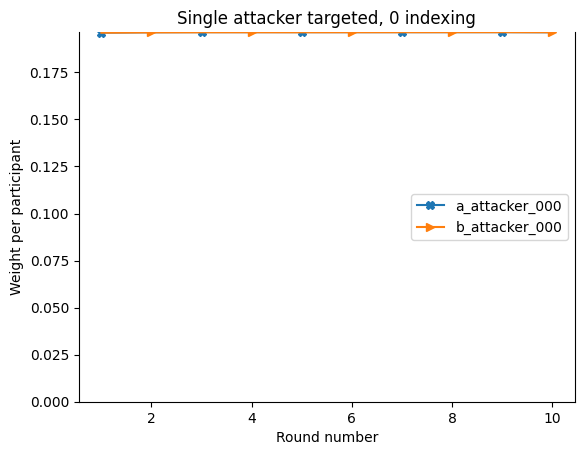

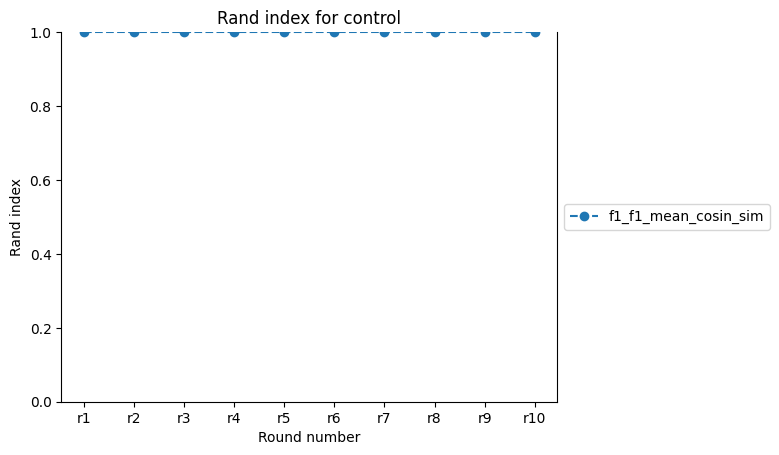

In [ ]:
p ="../outputs/2023-07-04/14-01-03"
p1 = "../multirun/2023-07-06/12-26-42/archi.strategy.reputation_system.lmbd=0.8,scenario_attacker=loud,scenario_distribution=lone,scenario_target=targeted"
test_unpacker(p,p1,dataset="aaaa")
plot_weights_in_cluster(p,dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p,p1 ,dataset="botiot",title="Single attacker targeted, 0 indexing", zero_indexed=True, attacker_only=True,labels=("a","b"))
plot_rand_comparison(p, title="Rand index for control")

### lambda = 0.8 (long term memory)

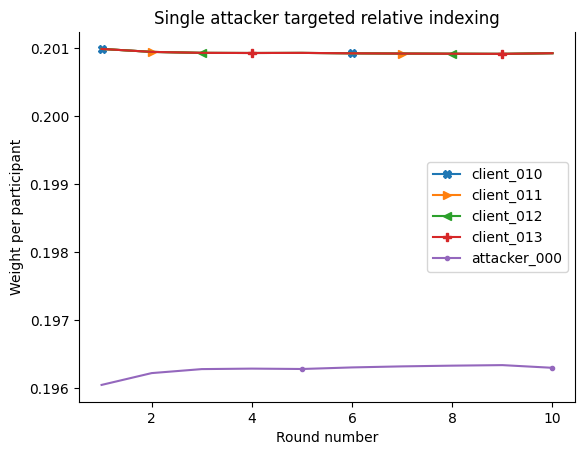

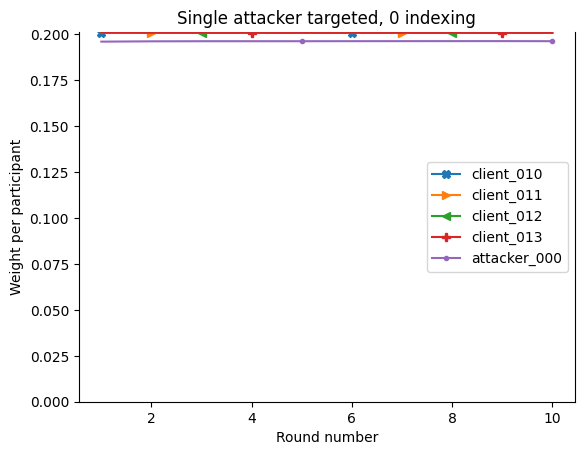

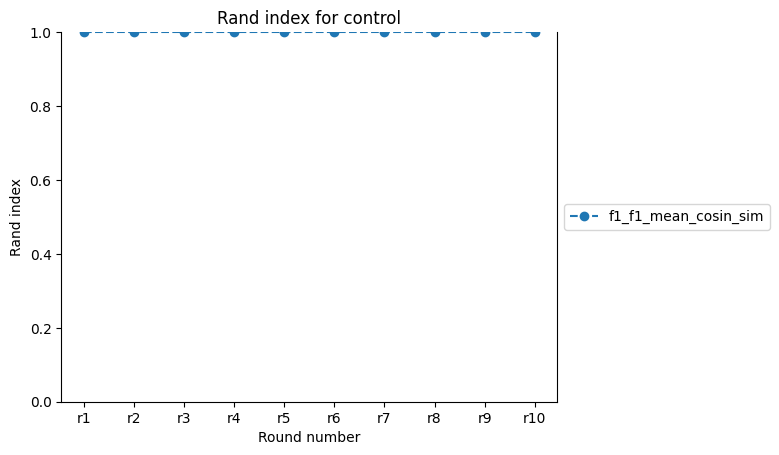

In [ ]:
p ="../multirun/2023-07-06/12-26-42/archi.strategy.reputation_system.lmbd=0.8,scenario_attacker=loud,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p, dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(p, dataset="botiot", title="Single attacker targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

#### Decrement

In [ ]:
p ="../multirun/2023-07-05/14-38-00/scenario_attacker=decrement,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p, dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Single attacker targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

SyntaxError: positional argument follows keyword argument (3253308845.py, line 3)

#### Increment

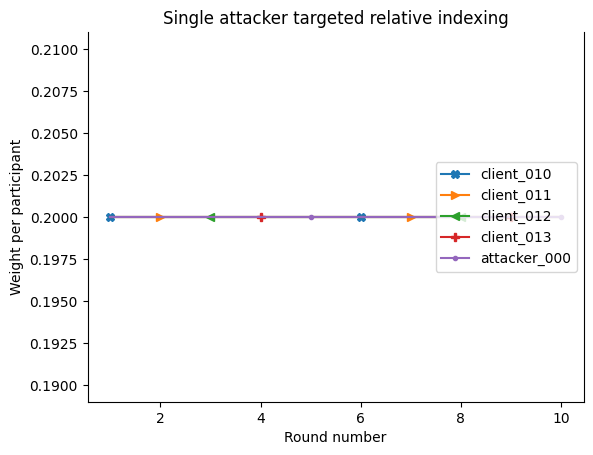

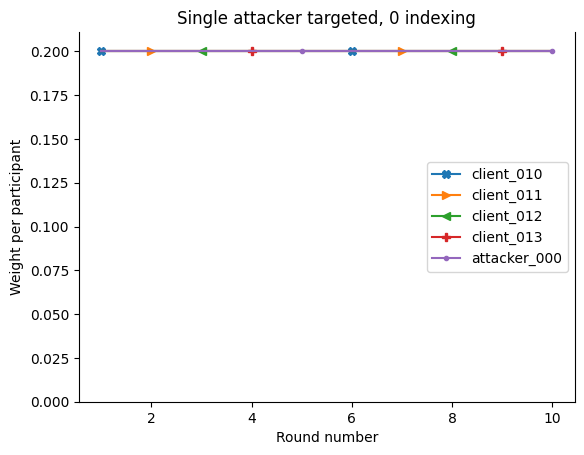

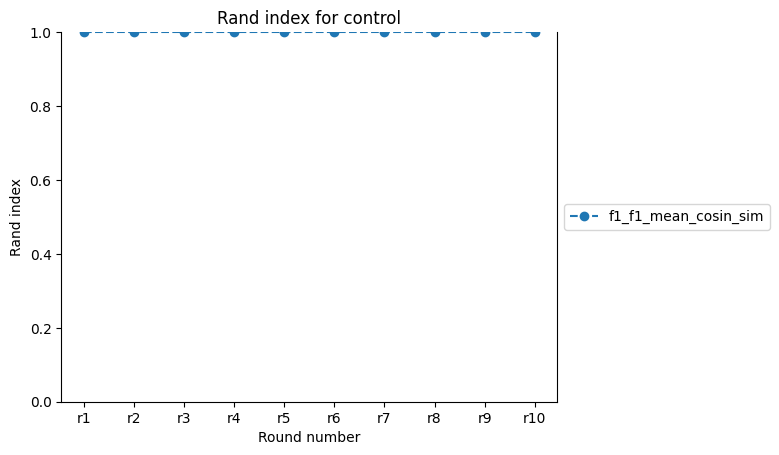

In [ ]:
p ="../multirun/2023-07-05/14-38-00/scenario_attacker=increment,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p, dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Single attacker targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

#### Redemption / lambda = 0.3 (short term memory)

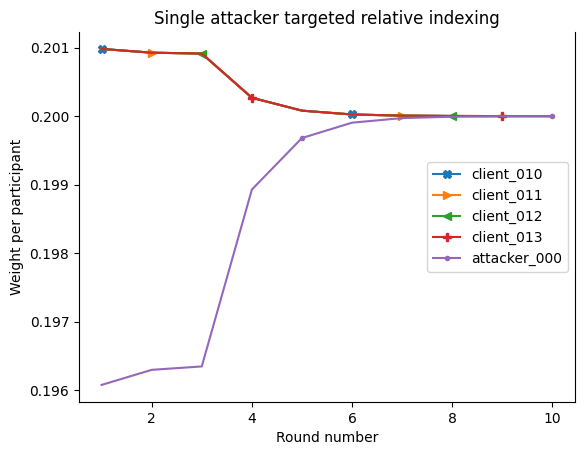

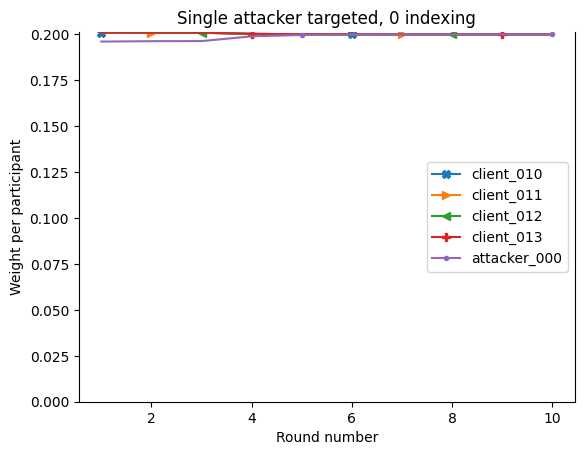

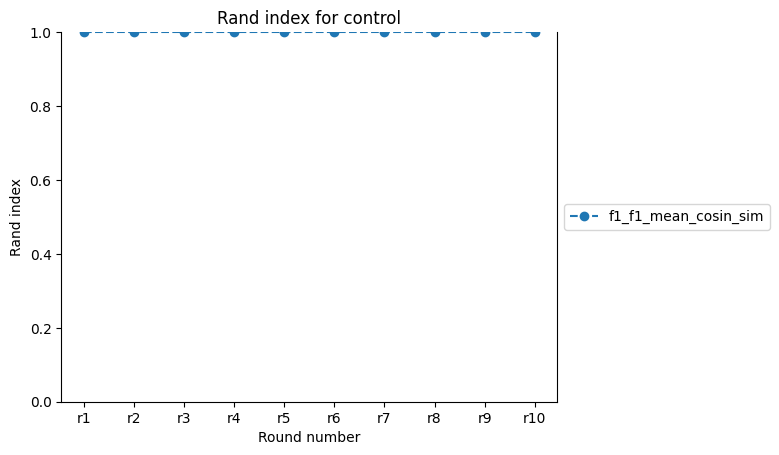

In [ ]:
# p ="../multirun/2023-07-05/14-38-00/scenario_attacker=redemption,scenario_distribution=lone,scenario_target=targeted"
p = "../outputs/2023-07-05/16-34-25"
plot_weights_in_cluster(p, dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Single attacker targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

# TODO false 

#### Redemption / lambda = 0.8 (long term memory)

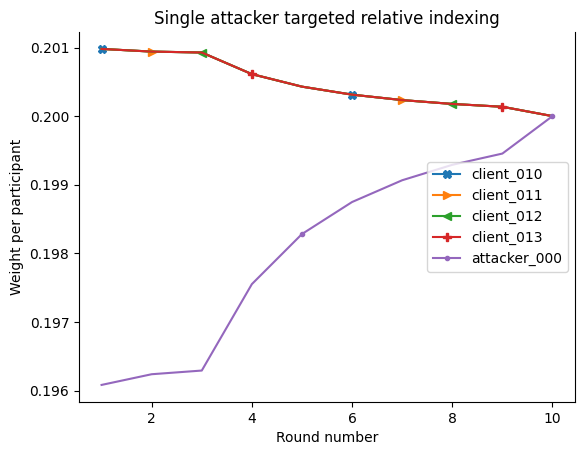

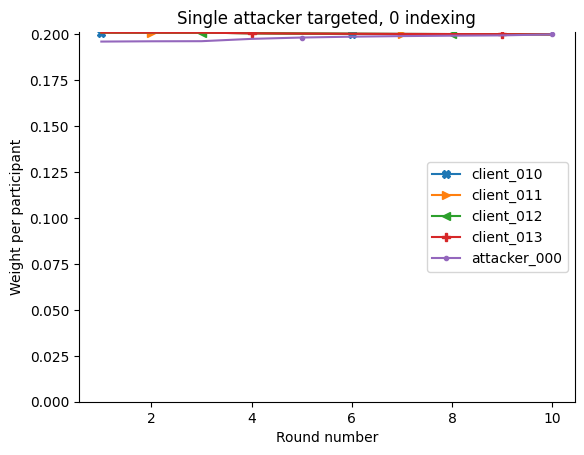

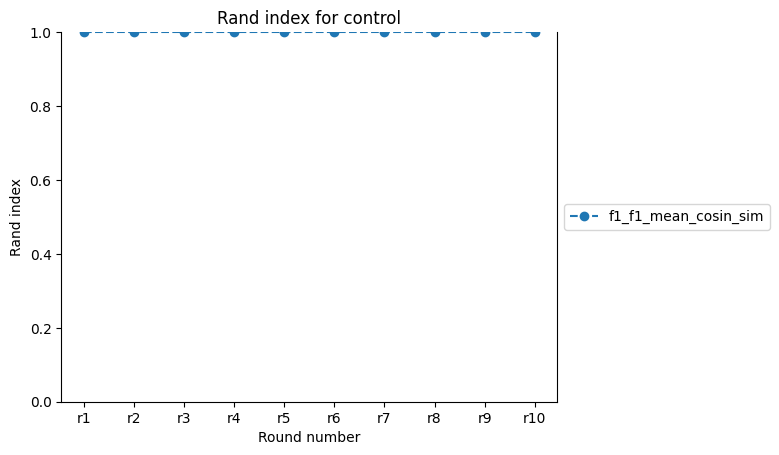

In [ ]:
p = "../multirun/2023-07-06/12-26-42/archi.strategy.reputation_system.lmbd=0.8,scenario_attacker=redemption,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster(p, dataset="botiot", title="Single attacker targeted relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Single attacker targeted, 0 indexing", zero_indexed=True)
plot_rand_comparison(p, title="Rand index for control")

### Untargeted


For now untargeted seems broken, either the model are poisonned but goes undetected or they are not poisonned. 

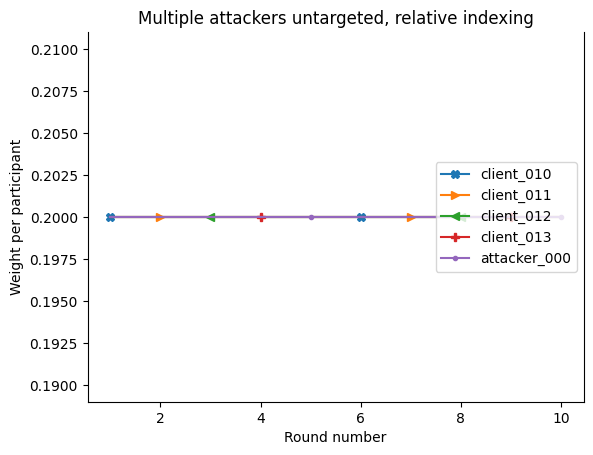

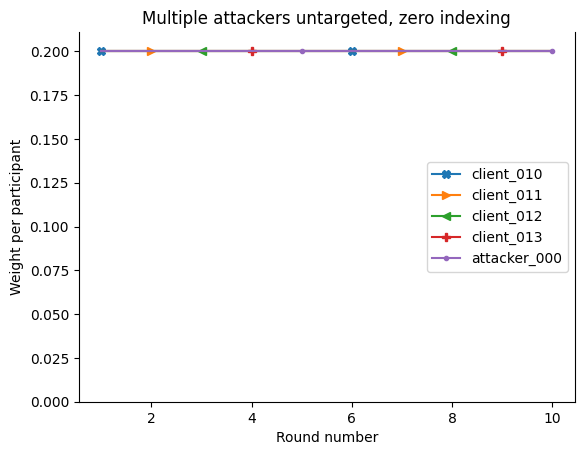

In [ ]:
p = "../outputs/2023-07-05/13-43-09"

plot_weights_in_cluster(p, dataset="botiot", title="Multiple attackers untargeted, relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Multiple attackers untargeted, zero indexing", zero_indexed=True )

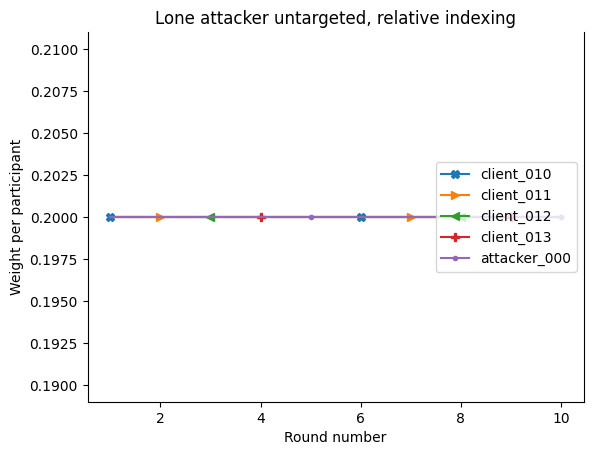

In [ ]:
p ="../outputs/2023-07-06/12-13-08"
plot_weights_in_cluster(p, dataset="botiot", title="Lone attacker untargeted, relative indexing")


## Sybils
### Targeted

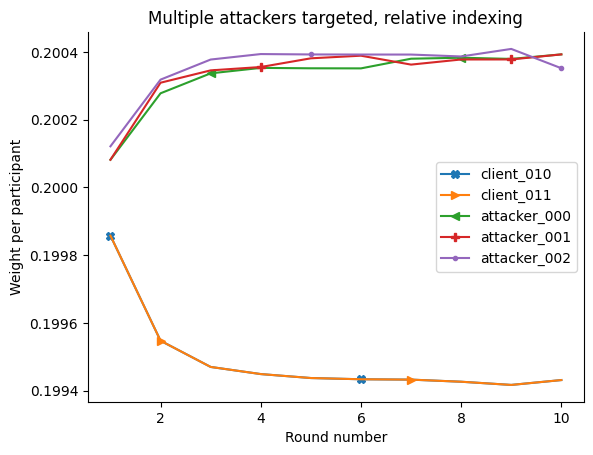

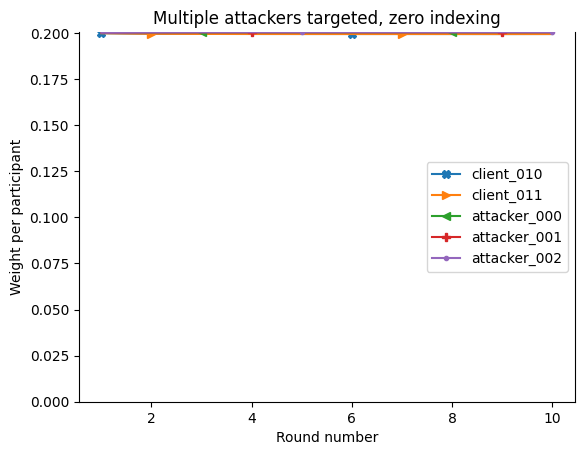

In [ ]:
p ="../outputs/2023-06-23/11-50-58"
plot_weights_in_cluster(p, dataset="botiot", title="Multiple attackers targeted, relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Multiple attackers targeted, zero indexing", zero_indexed=True )

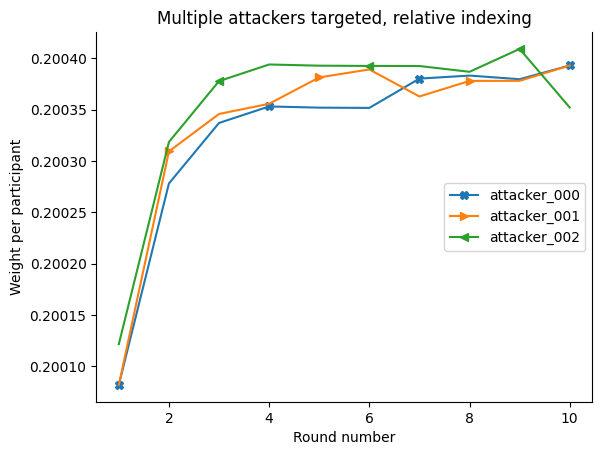

In [ ]:
p ="../outputs/2023-06-23/11-50-58"
plot_weights_in_cluster(p, dataset="botiot", attacker_only=True, title="Multiple attackers targeted, relative indexing")

### Untargeted

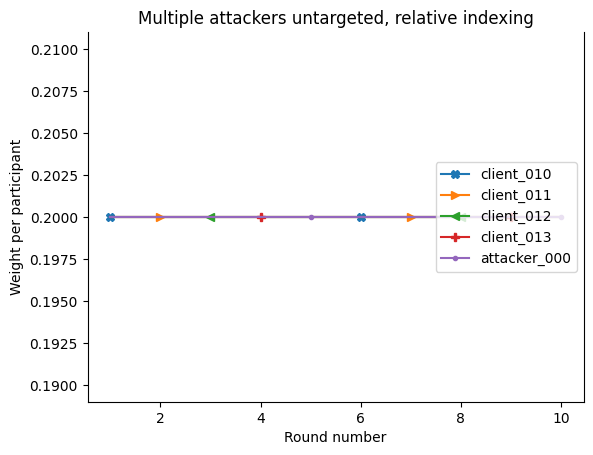

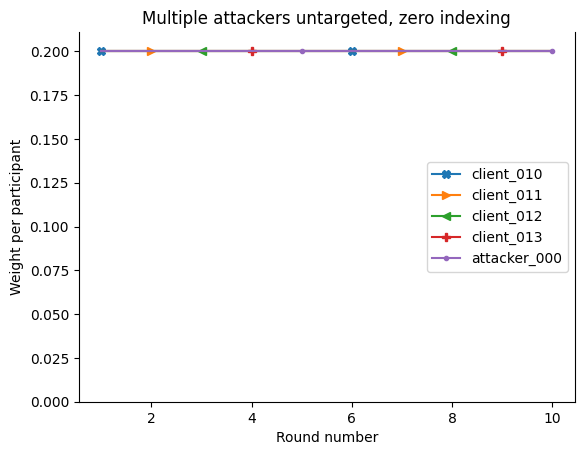

In [ ]:
p = "../multirun/2023-07-06/14-43-07/archi.strategy.reputation_system.lmbd=0.8,scenario_attacker=redemption,scenario_distribution=lone,scenario_target=untargeted"
plot_weights_in_cluster(p, dataset="botiot", title="Multiple attackers untargeted, relative indexing")
plot_weights_in_cluster(dataset="botiot",p ,title="Multiple attackers untargeted, zero indexing", zero_indexed=True )

## No memmory (lambda = 0)


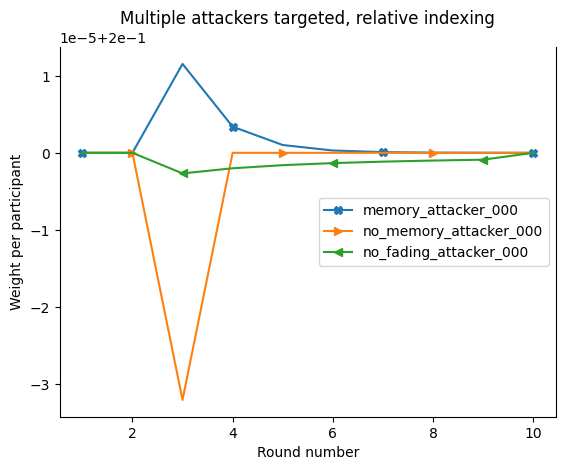

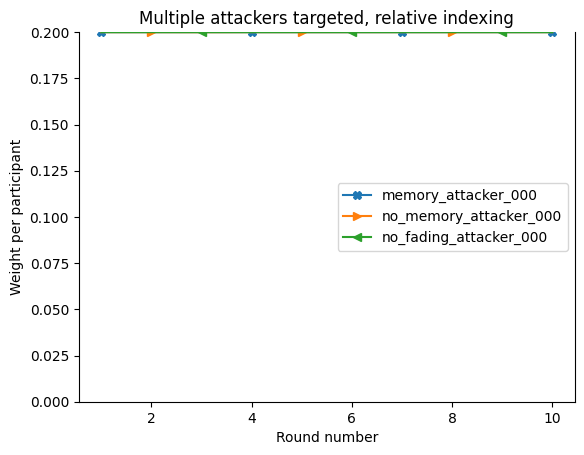

In [ ]:
memory_targeted = "./trustfids/one/targeted/stealth/hist_0.3"
no_memory_targeted ="./trustfids/one/targeted/stealth/hist_0"
no_fading_targeted = "../multirun/2023-08-22/11-38-10/archi.strategy.reputation_system.lmbd=1.0,scenario_attacker=stealth,scenario_distribution=lone,scenario_target=targeted"
plot_weights_in_cluster (memory_targeted,no_memory_targeted, no_fading_targeted,dataset="botiot", title="Multiple attackers targeted, relative indexing", attacker_only=True, labels = ("memory","no_memory","no_fading"))
plot_weights_in_cluster (memory_targeted,no_memory_targeted, no_fading_targeted, dataset="botiot", title="Multiple attackers targeted, relative indexing", zero_indexed=True, attacker_only=True, labels = ("memory","no_memory","no_fading"))


### Untargeted 

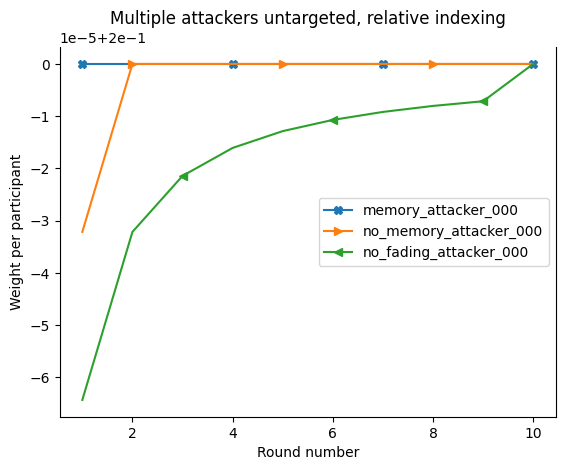

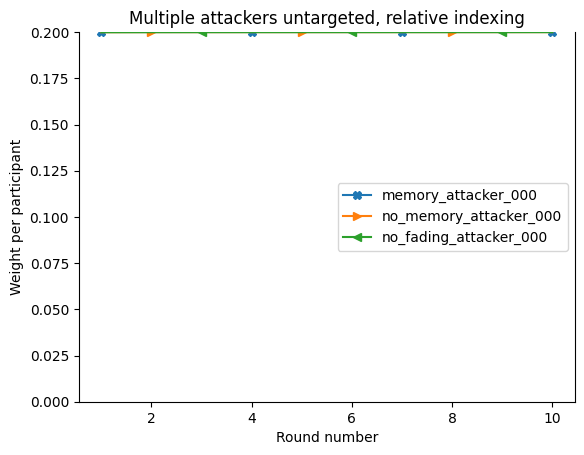

In [ ]:
memory_untargeted = "./trustfids/one/untargeted/stealth/hist_0.3"
no_memory_untargeted = "./trustfids/one/untargeted/stealth/hist_0"
big_memory_untargeted = "../multirun/2023-08-22/11-38-10/archi.strategy.reputation_system.lmbd=1.0,scenario_attacker=stealth,scenario_distribution=lone,scenario_target=untargeted"
plot_weights_in_cluster (memory_untargeted,no_memory_untargeted,big_memory_untargeted,dataset="botiot", title="Multiple attackers untargeted, relative indexing", attacker_only=True, labels = ("memory","no_memory","no_fading"))
plot_weights_in_cluster (memory_untargeted,no_memory_untargeted,big_memory_untargeted ,dataset="botiot", title="Multiple attackers untargeted, relative indexing",zero_indexed=True, attacker_only=True, labels = ("memory","no_memory","no_fading"))


In [ ]:

p = "../outputs/2023-09-06/16-42-44"
print(get_missrate_percent(p,"botiot","Reconnaissance"))

p = "../outputs/2023-09-06/17-09-02"
print(get_missrate_percent(p,"botiot","Reconnaissance"))

p = "../multirun/2023-09-08/13-13-23/+scenario_target=targeted,archi=foolsgold,scenario_attacker=loud,scenario_distribution=lone"
print(get_missrate_percent(p,"botiot","Reconnaissance"))

p = "../multirun/2023-09-08/13-17-30/archi=fedavg,scenario_distribution=benign"
print(get_missrate_percent(p,"botiot","Reconnaissance"))

p ="../multirun/2023-09-08/13-17-30/archi=foolsgold,scenario_distribution=benign"
print(get_missrate_percent(p,"botiot","Reconnaissance"))


('Miss rate : 5.241409308394954%', 'Detection rate :94.75859069160505%')
('Miss rate : 16.811657242279253%', 'Detection rate :83.18834275772075%')
('Miss rate : 93.09119907206032%', 'Detection rate :6.9088009279396845%')
('Miss rate : 9.19965202261853%', 'Detection rate :90.80034797738146%')
('Miss rate : 10.606060606060606%', 'Detection rate :89.39393939393939%')
